# YSC4224 Applied Data Science Final Year Project

Group 5: Ahmed Fedi Lassoued, Lim Shan En Daniel, Tristan Koh Ly Wey, Vasu Namdeo, Zen Alexander Goh Wei Han

## 1. <a id='toc1_'></a>[Introduction](#toc0_)

FairStorage, a regional supermarket chain, has tasked our team with coming up with a demand forecasting model in order for them to be able to better predict and coordinate their supply chains as well as pricing strategies. This will enable them to ensure that their customers get the products that they want, when they want them, while also ensuring that precious storage space is not taken up in the store by overly ordering goods, or worse still, having a large proportion of good expire on them. Due to the sheer number of products in each individual store that need to be factored into these decision making processes, Data Science is a useful tool to parse out unexpected associations and trends within the data, in order for us to offer a convincing and reasonable model that can assist FairStorage.

To do so, our exploration of Suitable models included an extensive EDA process to ascertain the basic structure of the data and keep an eye out for potential trends, followed by simplistic models using Naive, Window Average and Seasonal Window Average models, tweaking their seasonality, followed by Error Trend Seasoanlity Models and ARIMA Models, before finally navigating back onto familiar territory, using a standard Machine Learning Model, in this case, LGBM, fitting it onto our data with several new introduced features.

In all, our team found that the best model to be used was the simplest, with the Window Average Model at 21 days offering the best RMSE Score at 2.27. We continue to elaborate why other models either failed to perform to a similar standard or outright were unrealistic to model.

**Table of contents**<a id='toc0_'></a>    
1. [Introduction](#toc1_)    
2. [Exploratory Data Analysis](#toc2_)    
2.1. [Import Packages, Read Datasets and Define Functions](#toc2_1_)    
2.2. [Data Cleaning](#toc2_2_)    
2.2.1. [Overview of Datasets and Changing Variables Types:](#toc2_2_1_)    
2.3. [Merging `df_prices` with `df_calendar` to plot timeseries](#toc2_3_)    
2.3.1. [Descriptive statistics](#toc2_3_1_)    
2.4. [Examining of Trends of Prices](#toc2_4_)    
2.5. [Examining Trends of products sold in `train.csv`](#toc2_5_)    
2.6. [Decomposition Plot](#toc2_6_)    
2.7. [Tests for stationarity (ADF and KPSS)](#toc2_7_)    
2.8. [Lag Plots](#toc2_8_)    
2.9. [Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots](#toc2_9_)    
2.10. [Items Averaged Over the Category](#toc2_10_)    
3. [Simple (Naive and Others) and ETS Models](#toc3_)     
3.1 Forecasting with naive models

- 3.1.1 Forecasting with WindowAverage (for window sizes of 12, 14, 21, 28)

- 3.2 ETS (Error Trend Seasonality) model: HoltWinters (season length = 7)

- 3.3 Comparing other baseline models
3.4. [Review of Simple and ETS Models and Future Work](#toc3_3_)    
4. [Autoregressive Integrated Moving Average (ARIMA) Modelling](#toc4_)    
4.1. [Finding the Number of Differences](#toc4_1_)    
4.1.1. [ACF and PACF Plots](#toc4_1_1_)    
4.1.2. [Stationarity Tests after Differencing (ADF and KPSS)](#toc4_1_2_)    
4.2. [Testing ARIMA Model using Average Number of Items Sold](#toc4_2_)    
4.2.1. [Residuals Plot](#toc4_2_1_)    
4.2.2. [Actual Values vs Fitted Predictions](#toc4_2_2_)    
4.3. [Forecasting with ARIMA for the last 21 Days of the train Dataset](#toc4_3_)    
4.3.1. [Actual Values vs Fitted Predictions](#toc4_3_1_)    
4.4. [Simple ARIMA Forecast: Training Using the Mean Across All Items of Each Day in the `train` Dataset](#toc4_4_)    
4.5. [Using AUTOARIMA (On Product Category Level)](#toc4_5_)    
4.5.1. [Predictions On 20% of Data Using AUTO ARIMA / SARIMA](#toc4_5_1_)    
4.5.2. [Fitting Auto SARIMA Models for Each Product Category](#toc4_5_2_)    
4.6. [Conclusion and Future Work](#toc4_6_)    
5. [Machine Learning Modelling](#toc5_)    
5.1. [Data Structuring for Machine Learning (ML)](#toc5_1_)    
5.1.1. [Merge Sales and Prices and Calendar Data](#toc5_1_1_)    
5.1.2. [Create Long Form Dataframe](#toc5_1_2_)    
5.1.3. [Creating Lags for 7, 14 and 21 and Other Time-based Features](#toc5_1_3_)    
5.1.3.1. [Merge Lags into long train df](#toc5_1_3_1_)    
5.1.3.2. [Create Time-based Features](#toc5_1_3_2_)    
5.2. [Machine Learning Modelling Using Light Gradient Boosting Machine (LGBM)](#toc5_2_)    
5.2.1. [Data Cleaning](#toc5_2_1_)    
5.2.2. [Correlation of Price on Sales](#toc5_2_2_)    
5.2.3. [Fitting the LGBM Model](#toc5_2_3_)    
5.2.4. [Forecast for the Next 21 Days, Using the Entire `train` dataset](#toc5_2_4_)    
5.2.5. [Looking at the Best Features for the Model](#toc5_2_5_)    
5.2.6. [Evaluation of ML Model](#toc5_2_6_)    
5.2.7. [Future Work](#toc5_2_7_)  
6. Top models comparison and future work  
7. [Conclusion and future direction](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 2. <a id='toc2_'></a>[Exploratory Data Analysis](#toc0_)
To gain preliminary insights into the data, we have to: 
1. Clean the datasets 
2. Conduct some exploratory data analysis

These include formatting the datasets' variables to the correct types, merging them into the dataframes we want, generating summary statistics, examining trends in the data and visualisations of the data split by features.

### 2.1. <a id='toc2_1_'></a>[Import Packages, Read Datasets](#toc0_)

NOTE: Datasets and submissions string paths should not be changed, if not you would obtain import error later on.

NOTE: Installing dependencies

You can either run ```pip install -r requirements.txt``` from command line, or run the code chunk below. However, installing from ```requirements.txt``` is recommended since it installs the specific version and is generated straight from pip.

In [5]:
# %%capture 
# # %%capture hides code chunk output; note that this also hides if the code fails to run
# # Installing packages we will be importing
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install statsmodels
# !{sys.executable} -m pip install statsforecast
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install pmdarima
# !{sys.executable} -m pip install lightgbm

In [1]:
TRAIN_CSV_PATH = r"../datasets/train.csv"
PRICES_CSV_PATH = r"../datasets/prices.csv"
CAL_CSV_PATH = r"../datasets/calendar.csv"
SAMPLE_CSV_PATH = r"../datasets/sample_submission.csv"
EXPORT_PATH = r"../submissions/"

In [2]:
# Importing some packages we will be using later
import pandas as pd
from pandas.plotting import lag_plot, autocorrelation_plot

import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Naive models
import statsmodels.api as sm
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, WindowAverage, SeasonalWindowAverage, SimpleExponentialSmoothingOptimized, SeasonalExponentialSmoothingOptimized, Holt, HoltWinters

# ARIMA-related packages
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Self-defined helper functions
from func import *

c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_prices = pd.read_csv(PRICES_CSV_PATH)
df_cal = pd.read_csv(CAL_CSV_PATH)
df_sample_sub = pd.read_csv(SAMPLE_CSV_PATH)

### 2.2. <a id='toc2_2_'></a>[Data Cleaning](#toc0_)

#### 2.2.1. <a id='toc2_2_1_'></a>[Overview of Datasets and Changing Variables Types:](#toc0_)

Let's first understand the overall characteristics of the `train` dataset: the shape, the column types, descriptive statistics (if applicable), and if there are missing values.

In [8]:
df_train.head()

id       item_id subcat_id category_id store_id region_id  \
0  Beauty_1_001_East_1  Beauty_1_001  Beauty_1      Beauty   East_1      East   
1  Beauty_1_002_East_1  Beauty_1_002  Beauty_1      Beauty   East_1      East   
2  Beauty_1_003_East_1  Beauty_1_003  Beauty_1      Beauty   East_1      East   
3  Beauty_1_004_East_1  Beauty_1_004  Beauty_1      Beauty   East_1      East   
4  Beauty_1_005_East_1  Beauty_1_005  Beauty_1      Beauty   East_1      East   

   d_1  d_2  d_3  d_4  ...  d_1910  d_1911  d_1912  d_1913  d_1914  d_1915  \
0    0    0    0    0  ...       3       0       1       1       0       0   
1    0    0    0    0  ...       0       0       0       0       0       1   
2    0    0    0    0  ...       0       1       1       1       0       0   
3    0    0    0    0  ...       1       3       7       2       0       0   
4    0    0    0    0  ...       2       2       2       4       1       0   

   d_1916  d_1917  d_1918  d_1919  
0       0       2       0       3  
1       0       0       0       0  
2       1       1       0       2  
3       1       2       4       1  
4       2       3       1       0  

[5 rows x 1925 columns]

In [9]:
df_train.shape

(30490, 1925)

There are 30490 total records and 1919 days detailing the number of items sold.

For easier reference, here are the key features in the dataset:

`id` - an id identifying the smallest data granularity for which the forecast will be assessed: by product and by store

`item_id` - the id of the item

`subcat_id` - the id of the subcategory the item belongs to

`category_id` - the id of the category the item belongs to

`store_id` - the id of the store the product is sold at

`region_id` - the id of the region the store is located in

`wm_yr_wk` - week encoding

In [10]:
# Number of unique items
len(df_train["item_id"].unique())

3049

There are 3049 different items among all categories.

In [11]:
# Number of unique categories, stores and regions:
print(df_train["category_id"].unique())
print(df_train["store_id"].unique())
print(df_train["region_id"].unique())

['Beauty' 'Cleaning' 'Food']
['East_1' 'East_2' 'East_3' 'East_4' 'Central_1' 'Central_2' 'Central_3'
 'West_1' 'West_2' 'West_3']
['East' 'Central' 'West']


There are 3 categories of products, 10 stores, and 3 regions. Each region has 3 stores except for East, which has 4.

In [12]:
# Check NAs: All filled
df_train.isna().sum().sum()

0

In [13]:
# Convert to appropriate datatypes
df_train["id"] = df_train["id"].astype("string")
df_train["item_id"] = df_train["item_id"].astype("string")
df_train["subcat_id"] = df_train["subcat_id"].astype("string")
df_train["category_id"] = df_train["category_id"].astype("string")
df_train["store_id"] = df_train["store_id"].astype("string")
df_train["region_id"] = df_train["region_id"].astype("string")

Next, lets examine the `prices` dataset:

In [14]:
df_prices.head()

store_id       item_id  wm_yr_wk  sell_price
0   East_1  Beauty_1_001     11325        9.58
1   East_1  Beauty_1_001     11326        9.58
2   East_1  Beauty_1_001     11327        8.26
3   East_1  Beauty_1_001     11328        8.26
4   East_1  Beauty_1_001     11329        8.26

These are prices by each item in each store. We note that the prices are given at a weekly frequency, while the `train` dataset is of daily frequency.

Let's make sure that the columns have the right types attributed to them

In [15]:
df_prices["store_id"] = df_prices["store_id"].astype("string")
df_prices["item_id"] = df_prices["item_id"].astype("string")
df_prices["wm_yr_wk"] = df_prices["wm_yr_wk"].astype(int)
df_prices["sell_price"] = df_prices["sell_price"].astype(float)

Moving on to the `calendar` dataset, we see a sample of the first few rows and fix its variables types as well

In [16]:
df_cal.head()

date  wm_yr_wk    weekday  wday  month  year    d
0  2011-01-29     11101   Saturday     1      1  2011  d_1
1  2011-01-30     11101     Sunday     2      1  2011  d_2
2  2011-01-31     11101     Monday     3      1  2011  d_3
3  2011-02-01     11101    Tuesday     4      2  2011  d_4
4  2011-02-02     11101  Wednesday     5      2  2011  d_5

In [17]:
# Change dtypes
df_cal["date"] = pd.to_datetime(df_cal["date"])
df_cal["weekday"] = df_cal["weekday"].astype("string")
df_cal["d"] = df_cal["d"].astype("string")
df_cal["wm_yr_wk"] = df_cal["wm_yr_wk"].astype(int)

In [18]:
# Add column with months in string
month_names_ls = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_int_ls = list(range(1, 13))
month_names_dict = {month_int_ls[i]: month_names_ls[i] for i in range(len(month_int_ls))}

df_cal["month_name"] = df_cal["month"].replace(month_names_dict)

In [19]:
# Change to string datatype
df_cal["month_name"] = df_cal["month_name"].astype("string")

### 2.3. <a id='toc2_3_'></a>[Merging `df_prices` with `df_calendar` to plot timeseries](#toc0_)

In [20]:
df_prices_cal = pd.merge(df_prices, df_cal, on = "wm_yr_wk", how = "inner")

# Overview of how merged dataset looks like
df_prices_cal.head()

store_id       item_id  wm_yr_wk  sell_price       date    weekday  wday  \
0   East_1  Beauty_1_001     11325        9.58 2013-07-13   Saturday     1   
1   East_1  Beauty_1_001     11325        9.58 2013-07-14     Sunday     2   
2   East_1  Beauty_1_001     11325        9.58 2013-07-15     Monday     3   
3   East_1  Beauty_1_001     11325        9.58 2013-07-16    Tuesday     4   
4   East_1  Beauty_1_001     11325        9.58 2013-07-17  Wednesday     5   

   month  year      d month_name  
0      7  2013  d_897        Jul  
1      7  2013  d_898        Jul  
2      7  2013  d_899        Jul  
3      7  2013  d_900        Jul  
4      7  2013  d_901        Jul

In [21]:
df_prices_cal.shape

(47735397, 11)

We see this dataset has a large number of rows -- over 47 million rows.

As mentioned briefly earlier, `wm_yr_wk` in `prices` provides only details up to the specific week instead of day. Thus, the sell price would be the same for the same item for same week. So we can remove duplicates from the dataframe: as long as `store_id`, `item_id`, `wm_yr_wk`, `sell_price` are the same, we can drop the rows.

In [22]:
df_prices_cal = df_prices_cal.drop_duplicates(["item_id", "wm_yr_wk", "sell_price", "store_id"])
df_prices_cal.shape
df_prices_cal.index = df_prices_cal["date"]

Create new columns for Region and Item Category:

In [24]:
df_prices_cal["Category"] = df_prices_cal["item_id"].str.split("_", expand = True).iloc[:, 0]
df_prices_cal["Region"] = df_prices_cal["store_id"].str.split("_", expand = True).iloc[:, 0]

#### 2.3.1. <a id='toc2_3_1_'></a>[Descriptive statistics](#toc0_)

Summary statistics by region for the `prices_cal` dataframe:

In [26]:
df_prices_cal.groupby(by = "Region")["sell_price"].describe()

count      mean       std   min   25%   50%   75%     max
Region                                                                
Central  2092122.0  4.376181  3.375513  0.02  2.00  3.42  5.84   52.62
East     2708822.0  4.416770  3.414746  0.01  2.18  3.47  5.77   30.98
West     2040177.0  4.438885  3.434513  0.01  2.18  3.47  5.94  107.32

Summary statistics by item category:

In [27]:
df_prices_cal.groupby(by = "Category")["sell_price"].describe()

count      mean       std   min   25%   50%   75%     max
Category                                                               
Beauty    1283905.0  5.333896  4.828999  0.01  1.97  3.97  7.47   30.98
Cleaning  2375427.0  5.465780  3.375843  0.01  2.98  4.94  6.97  107.32
Food      3181789.0  3.251027  2.132220  0.01  1.98  2.68  3.98   19.48

### 2.4. <a id='toc2_4_'></a>[Examining of Trends of Prices](#toc0_)

Time series plot of prices split by category:

<AxesSubplot:xlabel='date', ylabel='sell_price'>

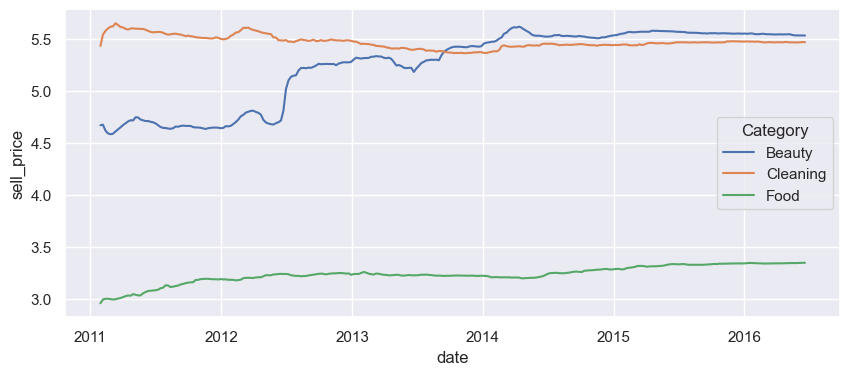

In [28]:
sns.set(rc={'figure.figsize':(10, 4)})

sns.lineplot(x = "date", y = "sell_price", data = df_prices_cal, hue = "Category", errorbar = None)

We see that prices of food products across the regions have increased slightly. We also see that prices of beauty products have been generally increasing with a sharp bump in 2012, while prices of cleaning products have had a slightly declining trend.

Now we make the same visualisation but for prices split by region:

<AxesSubplot:xlabel='date', ylabel='sell_price'>

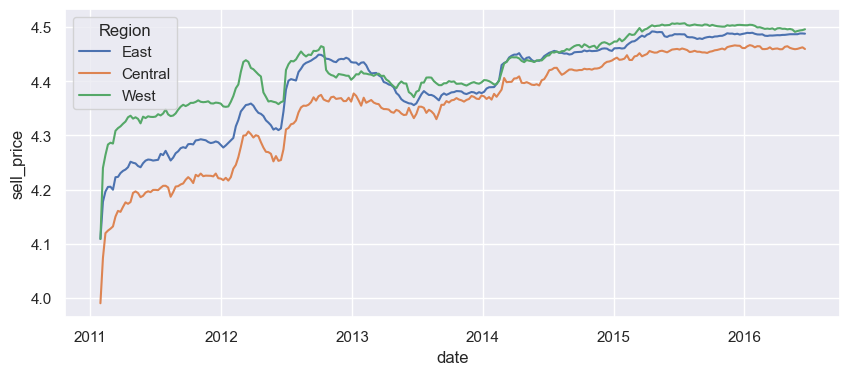

In [29]:
sns.lineplot(x = "date", y = "sell_price", data = df_prices_cal, hue = "Region", errorbar = None)

When grouped by region, we see that the prices have followed a very similar trend across the years through all regions, with the regional differences in prices becoming smaller across time.

Now let's look at how prices for all products and regions change throughout each year:

In [30]:
df_prices_cal.sort_values(by = ["wday", "month", "year"]).groupby(by = ["month_name", "year"])["sell_price"].describe()

count      mean       std   min   25%   50%   75%    max
month_name year                                                             
Apr        2011   72313.0  4.246382  3.097231  0.08  1.98  3.28  5.68  28.00
           2012   75131.0  4.343223  3.118952  0.05  2.18  3.48  5.84  24.92
           2013   94366.0  4.379752  3.320766  0.05  2.18  3.42  5.84  30.98
           2014  110565.0  4.430970  3.507801  0.07  2.00  3.33  5.84  30.98
           2015  120242.0  4.481990  3.543262  0.20  2.18  3.48  5.88  29.97
...                   ...       ...       ...   ...   ...   ...   ...    ...
Sep        2011   64311.0  4.276785  3.078485  0.05  2.00  3.34  5.72  28.00
           2012  104498.0  4.421271  3.339402  0.07  2.18  3.48  5.88  52.62
           2013  101388.0  4.377193  3.414627  0.01  2.08  3.38  5.78  30.98
           2014  116087.0  4.446928  3.521286  0.05  2.14  3.47  5.88  30.98
           2015  121629.0  4.479394  3.540136  0.10  2.24  3.48  5.88  35.88

[66 rows x 8 columns]

A common characteristic of time series is a seasonal component. For the dataset of weekly frequency, we want to see if we can observe such patterns over the year or month. 

<AxesSubplot:xlabel='month_name', ylabel='sell_price'>

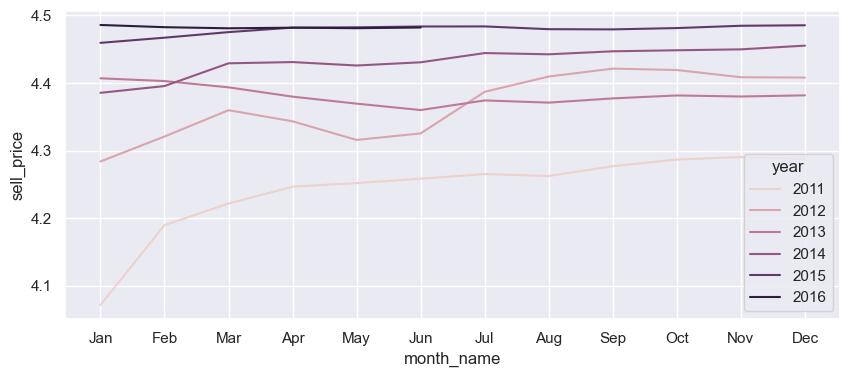

In [31]:
# Seasonal plot by month and year
sns.set(rc={'figure.figsize':(10, 4)})

sns.lineplot(x = "month_name", y = "sell_price", data = df_prices_cal.sort_values(by = ["wday", "month", "year"]), hue = "year", errorbar=None)

From this graph, there does not appear to be any common trend across the years.

We will observe if there is any seasonality within each month with a decomposition plot later in **Section 3**.

### 2.5. <a id='toc2_5_'></a>[Examining Trends of products sold in `train.csv`](#toc0_)

In [32]:
# Creating unique demographic labels for plotting later
category_ls = list(df_train["category_id"].unique())
store_ls = list(df_train["store_id"].unique())
region_ls = list(df_train["region_id"].unique())

In [33]:
# Save day IDs from train
day_ids = list(df_train.columns[6:])

Now we make some visualisations that show the number of items sold for each type of cross-sectional data over the 1919 days.

In [34]:
# Create a temporary dataset to make the plots
df_items_temp = df_train[["id"]+day_ids].T
df_items_temp.columns = df_items_temp.iloc[0, :]

# Drop first row
df_items_temp = df_items_temp.iloc[1: , :]

# Copy the index to merge date
df_items_temp["d"] = df_items_temp.index

# Merge date into df
df_items_temp = pd.merge(df_items_temp, df_cal, on = "d", how = "left")
df_items_temp = df_items_temp.set_index("date")

# Calculate average items across items per day
df_items_temp["avg_items_sold"] = df_items_temp[list(df_train["id"])].mean(axis = 1)

<AxesSubplot:xlabel='date'>

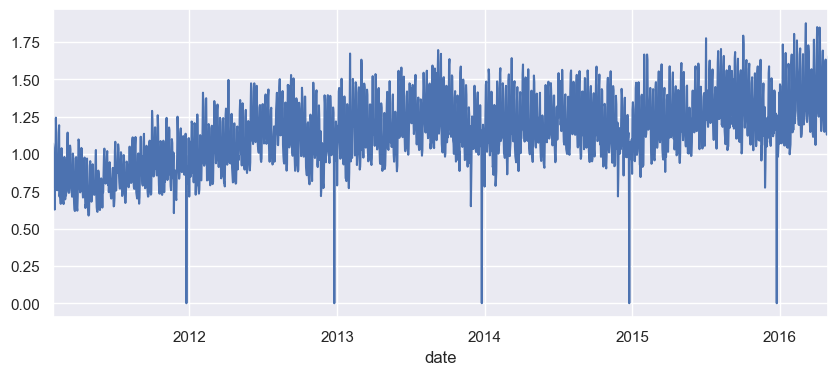

In [36]:
# Plot of average items sold each day
sns.set(rc={'figure.figsize':(10, 4)})

df_items_temp["avg_items_sold"].plot()

This plot shows us the existence of outliers, which occur near the end of every year. As the data that needs to be forecasted is near the middle of 2016, we do not need to worry much about the possibility of this drop in demand occuring during the forecasted period.

Plotting the rolling average should be able to let us reduce the impact of the outliers in our visualisation.

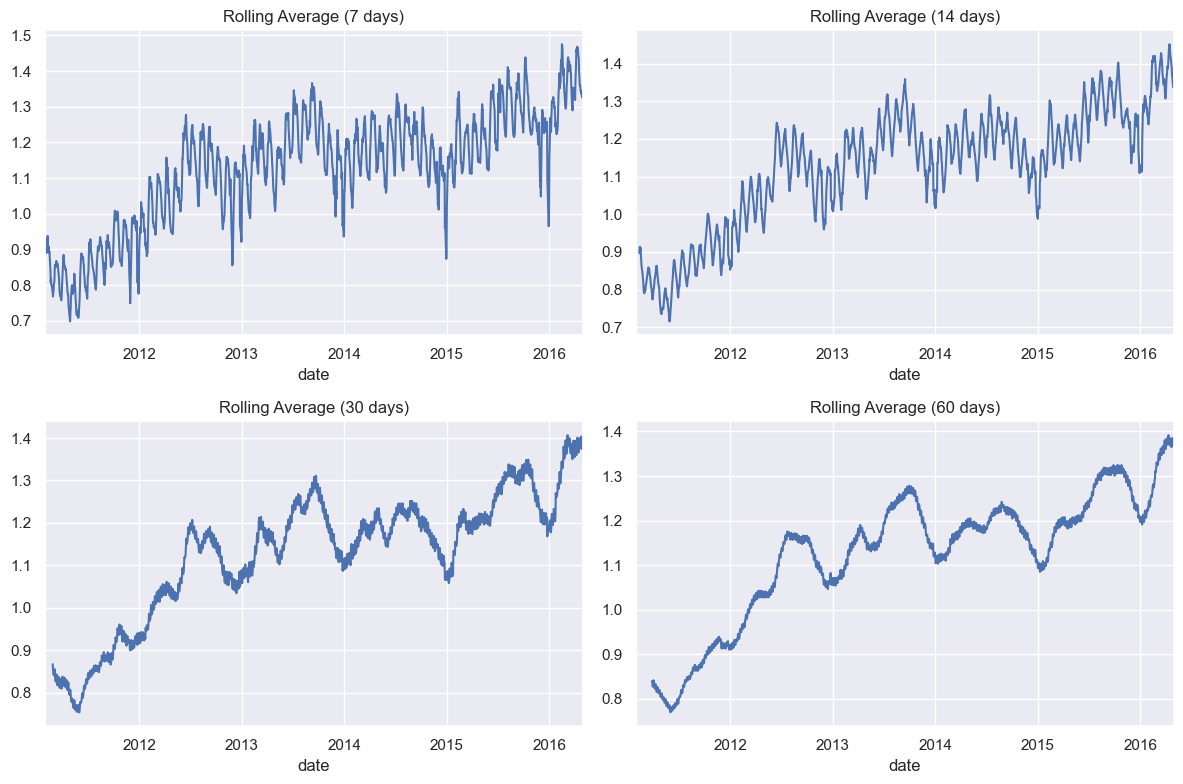

In [37]:
sns.set(rc={'figure.figsize':(14, 6)})
plot_rolling_average(df_items_temp["avg_items_sold"])

Taking a rolling average reduces the impact of the outliers and allows us to observe the underlying trend of demand across the years.

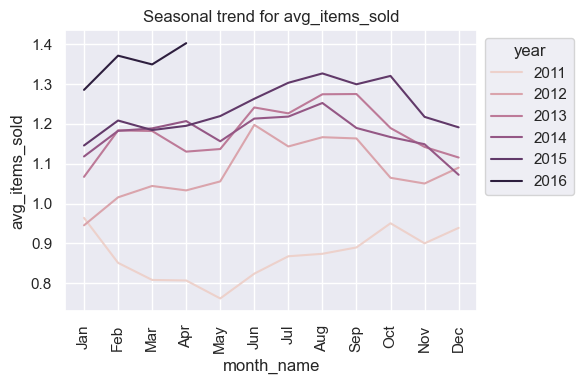

In [38]:
# Seasonal plot by month of the year
sns.set(rc={'figure.figsize':(10, 4)})
plot_seasonal("month_name", ["avg_items_sold"], "year", df_items_temp, 1, 1, 6, 4)

From this we observe that there is a small trend of demand increasing until the later half of the year, and then dropping around September. In general, demand appears to be increasing across the years, corroborating with our earlier plot.

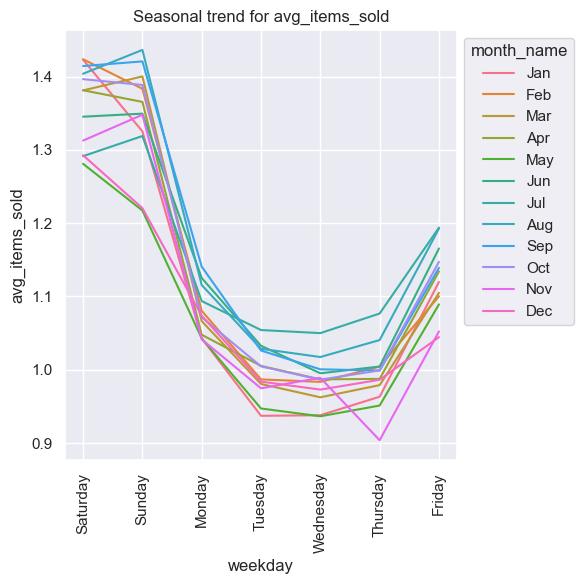

In [39]:
# Seasonal plot by day of the week:
plot_seasonal("weekday", ["avg_items_sold"], "month_name", df_items_temp, 1, 1, 6, 6)

This plot shows a clear weekly trend, as each week across the months shows a similar demand on each day of the week, which will have to be taken into account during our modelling. Let's formally test this.

### 2.6. <a id='toc2_6_'></a>[Decomposition Plot](#toc0_)

There is an even clearer way of observing seasonality in our time series: that is by decomposing them into trend and seasonality and residuals.

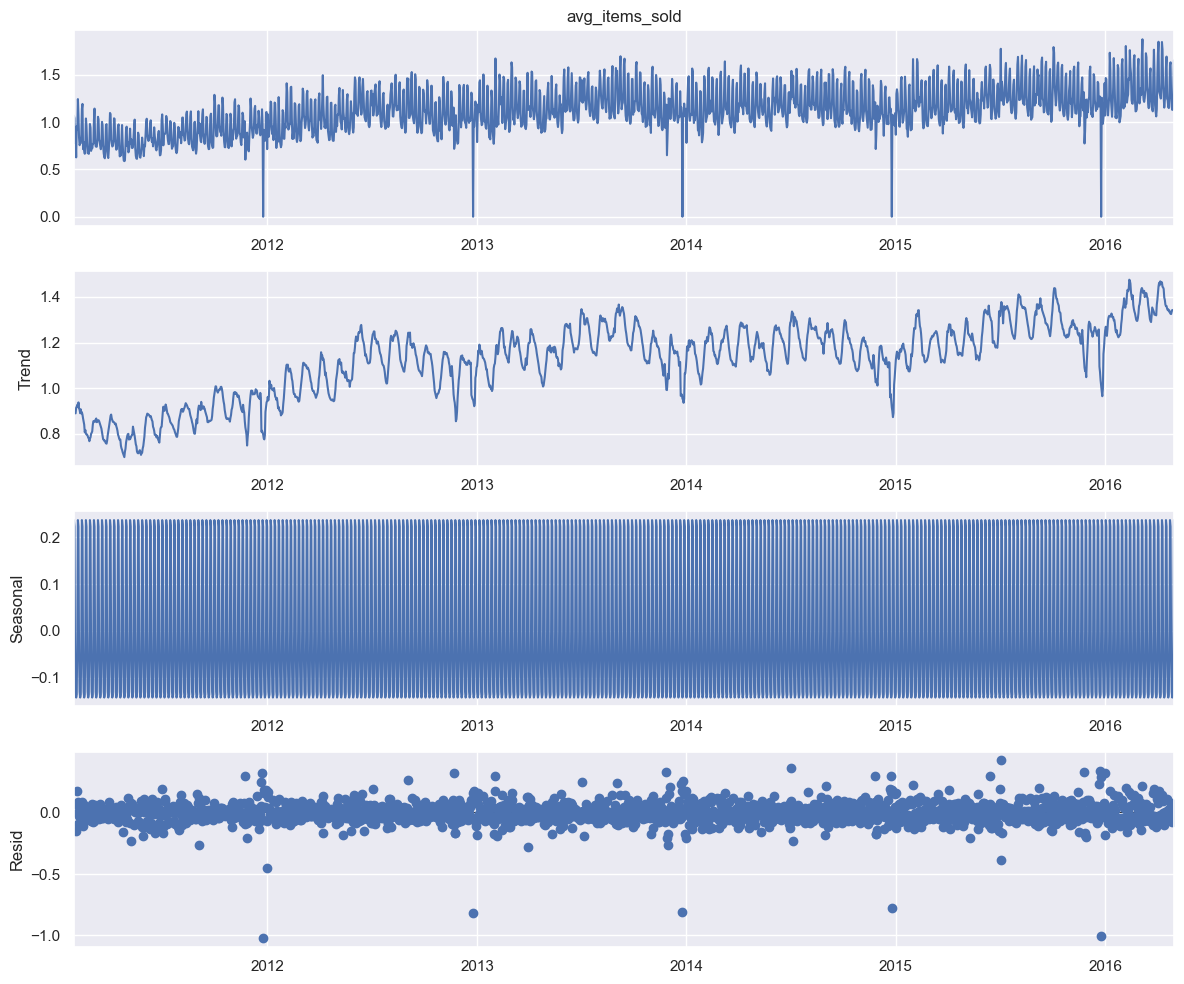

In [40]:
# Decomposition plot
sns.set(rc={'figure.figsize':(12, 10)})

decomposed_result = sm.tsa.seasonal_decompose(df_items_temp["avg_items_sold"], model = "additive")
decomposed_result.plot()
plt.show()

From the decomposition plot, we observe the following: 
- There are fluctations in the trend of items sold over time, but there is an overall increasing trend in items sold over time. 
- As observed earlier, there is a sharp drop in items sold towards the end of each year. 
- Variance does not seem to change much over each year as the residuals are clustered around the same area without any positive trend.

### 2.7. <a id='toc2_7_'></a>[Tests for stationarity (ADF and KPSS)](#toc0_)

A desirable trait when analysing time series is that the series is stationary (or has no unit roots). This means that there is no significant autocorrelations between lags and the mean is constant at zero. A stationary time series can be modelled easier and many modelling techniques such as Autoregressive Integrated Moving Average (ARIMA) modelling require the assumption that the time series is stationary. Stationary time series are also more predictable and thus easier to forecast with accuracy. 

There are statistical tests commonly used in time series analysis to investigate if a time series is stationary or not (or if they have unit roots; if they do, the series is not stationary). The Augmented Dickey-Fuller (ADF) test has the null hypothesis that the time series is not stationary and has the alternative that it is stationary. Thus, in our case, **we would like to reject the null hypothesis of the ADF test** and consider the alternative. There is also the Kwiatkowski-Phillips-Schidt-Shin (KPSS) Test which has the null hypothesis that the time series is stationary and the alternative that the series is not stationary. Thus, in our case, **we would like to be unable to reject the null hypothesis of the KPSS test**.

In [41]:
# ADF Test:
adf_test(df_items_temp["avg_items_sold"])

Results of Dickey-Fuller Test:
Test Statistic                   -1.602145
p-value                           0.482516
#Lags Used                       26.000000
Number of Observations Used    1892.000000
Critical Value (1%)              -3.433811
Critical Value (5%)              -2.863069
Critical Value (10%)             -2.567584
dtype: float64


Unfortunately, by conventional significance levels, we cannot reject the null hypothesis of the ADF test as p_value = 0.48 > 0.05. Hence this test tells us our series is likely non-stationary.

In [42]:
kpss_test(df_items_temp["avg_items_sold"])

Results of KPSS Test:
Test Statistic            6.443358
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Here, we receive the warning that the actual p-value is less than 0.01. This means we can reject the null hypothesis of the KPSS test as our p_value < 0.01 < 0.05. Hence, this test also tells us our series is non-stationary. 

Earlier, we have seen that there are some trends in the units sold over time -- unsurprisingly, both tests confirm that the series is non stationary. So we probably need to difference the time series to achieve stationarity so that the models can be fit.

### 2.8. <a id='toc2_8_'></a>[Lag Plots](#toc0_)

Lag plots plot the points of $y_t$ against $y_{t-k}$, where $y_t$ is the number of units sold at time $t$ and $k$ is the number of periods we are looking behind time $t$. Lag plots can help us determine the number of levels we might need to difference our time series. They also give insight into the seasonality window if there is a seasonal component present (and as seen from the decomposition plot earlier, we are led to believe so). If we notice that the lag plots form a linear trend that resembles the $y=x$ graph, it means that there is a strong correlation between $y_t$ and $y_{t-k}$.

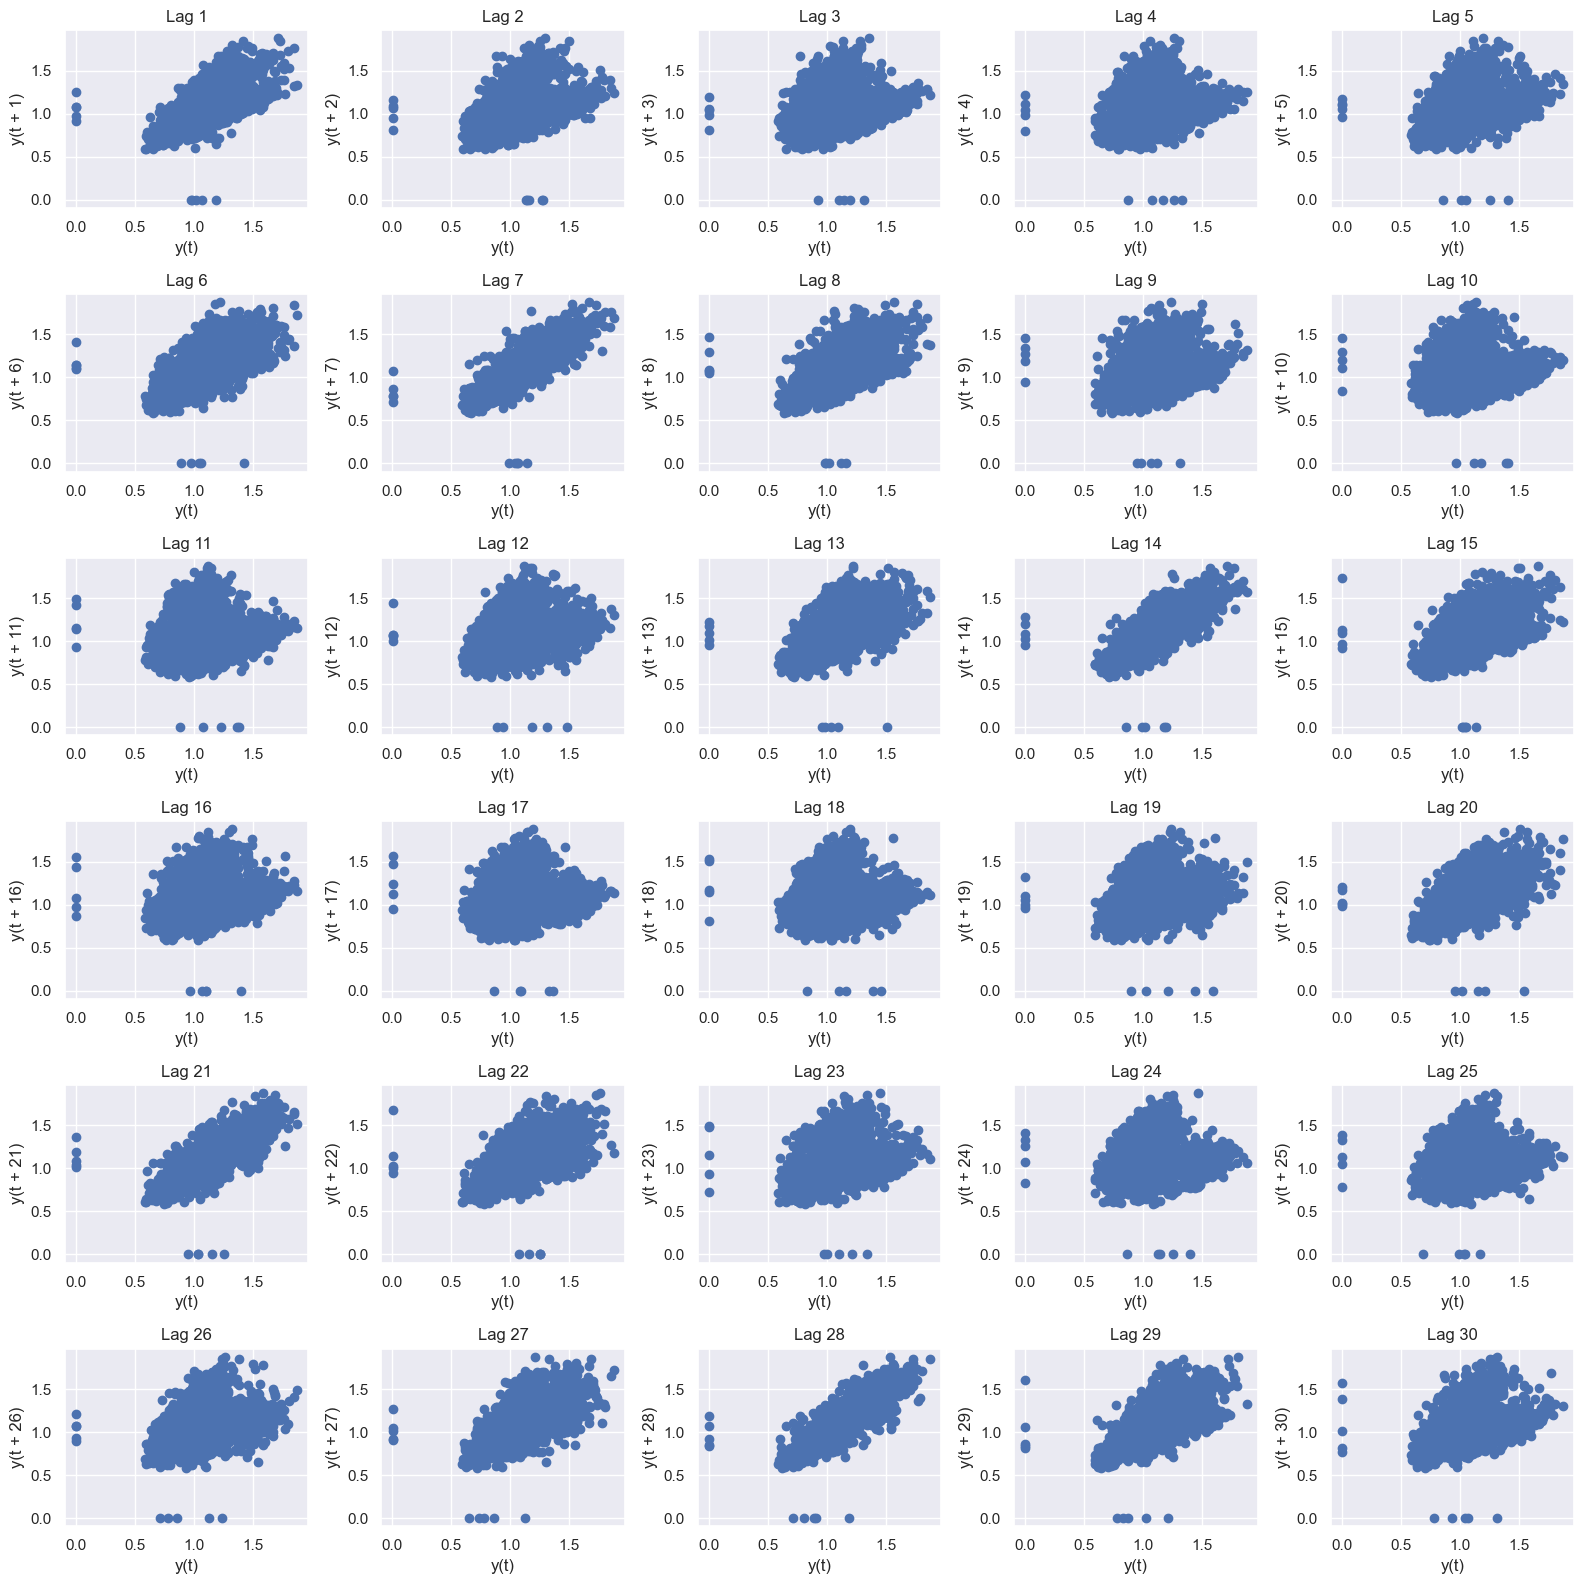

In [43]:
# lag plots for 30 lags:
plot_lags(df_items_temp["avg_items_sold"])

We see strong correlations between time $t$ and every week and multiples of 1 week: Lags 7, 14, 21 and 28 are all the most linear plots. So, we can infer that there is a weekly seasonal cycle of number of items sold. 

Additionally, we do see a strong correlation with the plot with lag 1, indicating that there may be a correlation between the number of units sold from the previous day.

### 2.9. <a id='toc2_9_'></a>[Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots](#toc0_)

Each bar represents the correlation between the original series and its $k$-th lag. The first bar is always equal to one as this is simply measuring the variable correlated with itself. The blue line apparent in any plot represents statistically significant values other than 0, meaning any bars underneath this threshold are not statistically significant. 

The ACF plot reinforces our analysis of the lag plots from above. In addition to the large autocorrelation at Lag 1 and at Lags of multiples of 7, we also see more clearly than in the lag plot, that the autocorrelation decreases before increasing and peaking at lags of multiples of 7.

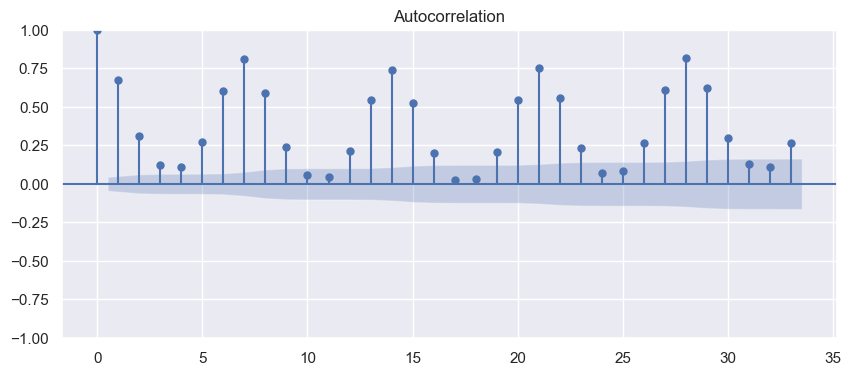

In [44]:
sns.set(rc={'figure.figsize':(10, 4)})
sm.graphics.tsa.plot_acf(df_items_temp["avg_items_sold"])
plt.show()

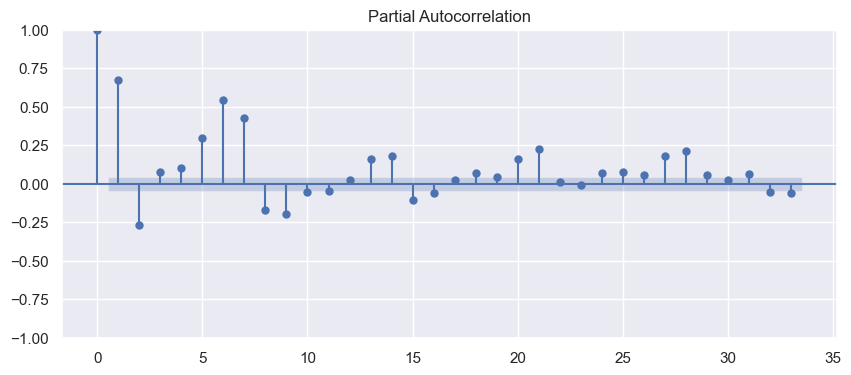

In [45]:
sm.graphics.tsa.plot_pacf(df_items_temp["avg_items_sold"], method = "ywm")
plt.show()

### 2.10. <a id='toc2_10_'></a>[Items Averaged Over the Category](#toc0_)

In [46]:
# Calculating the average after grouping by item category
df_cat_temp = df_train.groupby(["category_id"]).mean()
df_cat_temp.reset_index(inplace=True)

# reshape dataframe longer
df_cat_temp = pd.DataFrame(
    data = {
    "d" : df_cat_temp.columns[1:],
    "Beauty" : df_cat_temp.iloc[0, 1:],
    "Cleaning" : df_cat_temp.iloc[1, 1:],
    "Food" : df_cat_temp.iloc[2, 1:]
    }
)
# convert d to string to match cal and merge
df_cat_temp["d"] = df_cat_temp["d"].astype("string")
# merge with calendar data
df_cat_temp = pd.merge(df_cat_temp, df_cal, on = "d", how = "left")
# set index
df_cat_temp = df_cat_temp.set_index("date")

<AxesSubplot:xlabel='date'>

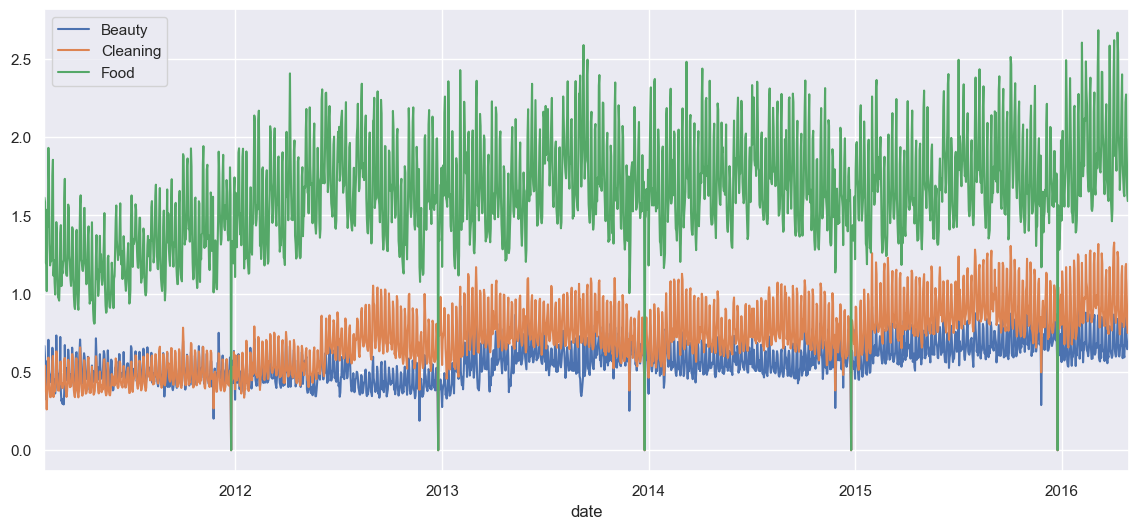

In [47]:
sns.set(rc={'figure.figsize':(14, 6)})

df_cat_temp[category_ls].plot()

Food has higher sales than Beauty and Cleaning products on average, for all years. All the categories seem to exhibit some sort of seasonal/cyclical pattern.

We see that dividing by categories, the ACF plots still show the same weekly seasonality that we had observed earlier in Section 2.9.

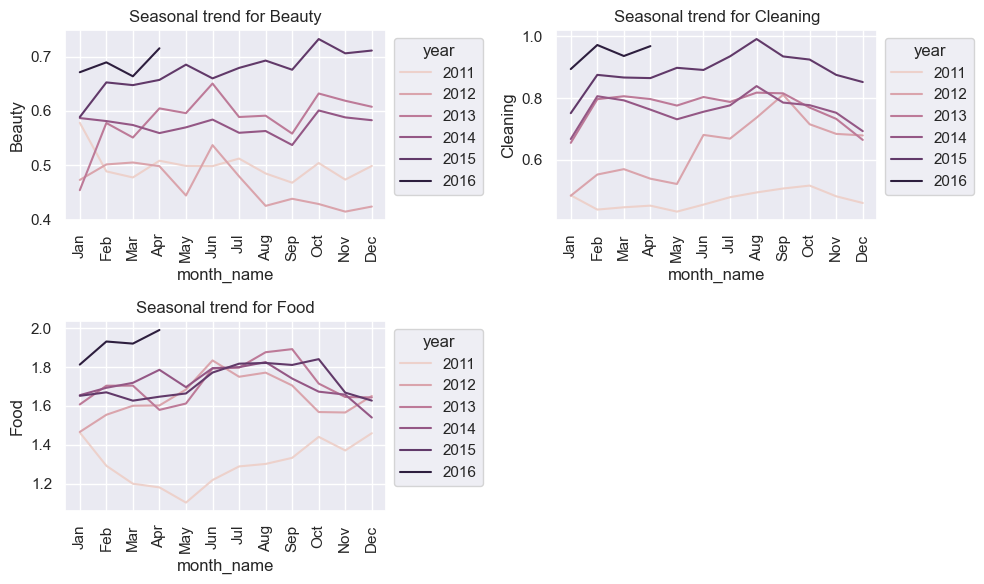

In [48]:
plot_seasonal("month_name", category_ls, "year", df_cat_temp, 2, 2, 10, 6)

From the plot above, we see that broken down by category, there are different trends for each category throughout a year. For beauty products, sales in more recent years seem to be higher at the last few months of the year. For cleaning products, July to September have spikes in products sold. For food products, sales tend to drop in the end of the year and are higher in the middle of the year. These insights may allow for FairStorage to arrange for more beauty products in the last few months of the year, more cleaning procuts in July to Septemeber and perhaps a promotion to increase sales of food products at the end of the year.

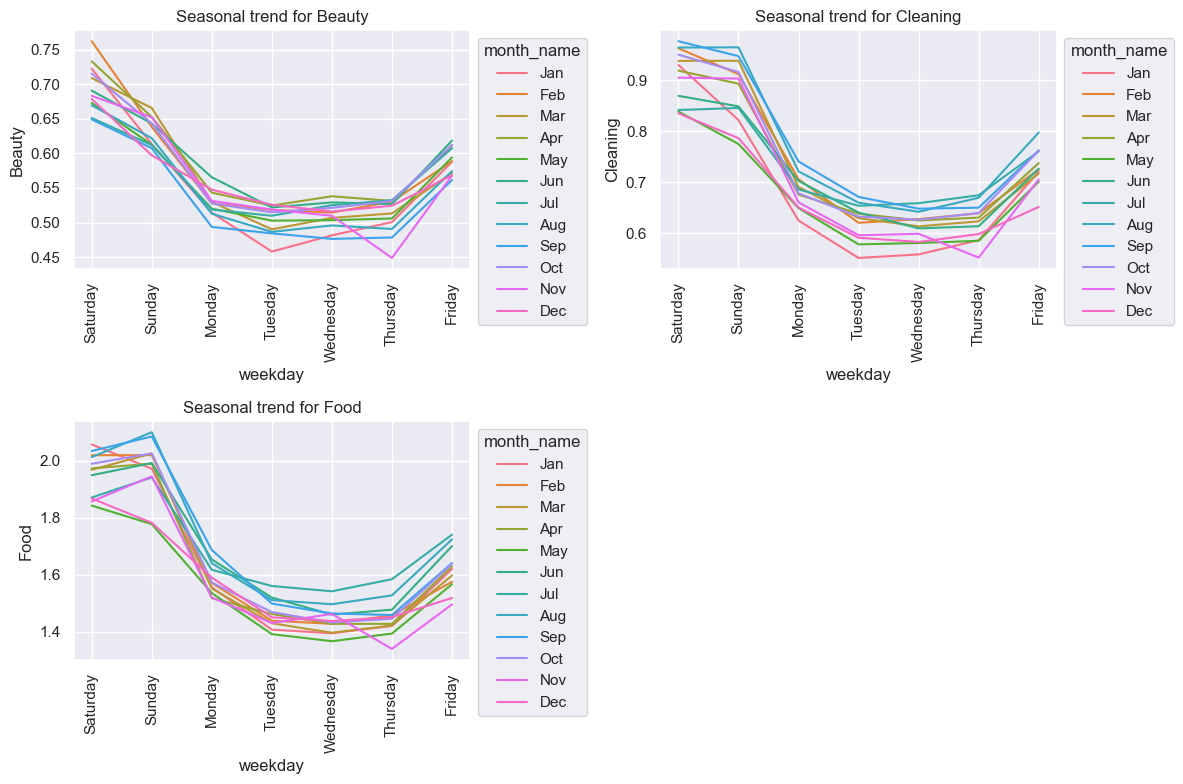

In [49]:
plot_seasonal("weekday", category_ls, "month_name", df_cat_temp, 2, 2, 12, 8)

When looking at a similar plot but for over the week instead of the year, we see that products from all 3 categories sell more on average over the weekend and gradually increase on Fridays. However, on Sunday, we see that food anc leaning products have a higher bump in sales than beauty products.

In [50]:
# Items averaged over the regions
df_region_temp = df_train.groupby(["region_id"]).mean()
df_region_temp.reset_index(inplace=True)

df_region_temp = pd.DataFrame(
    data = {
    "d" : df_region_temp.columns[1:],
    "Central" : df_region_temp.iloc[0, 1:],
    "East" : df_region_temp.iloc[1, 1:],
    "West" : df_region_temp.iloc[2, 1:],
    }
)

df_region_temp["d"] = df_region_temp["d"].astype("string")

df_region_temp = pd.merge(df_region_temp, df_cal, on = "d", how = "left")
df_region_temp = df_region_temp.set_index("date")

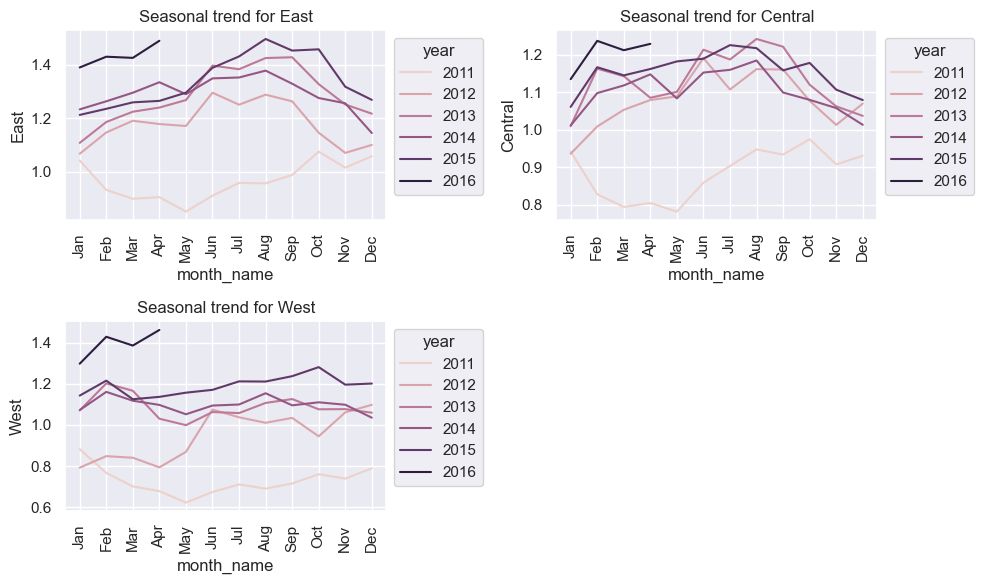

In [51]:
# Regional plots over the year
plot_seasonal("month_name", region_ls, "year", df_region_temp, 2, 2, 10, 6)

We see that more products are sold on average for the East and Central in the middle of the year and lesser are sold in the rest of the year in the East and Central. 

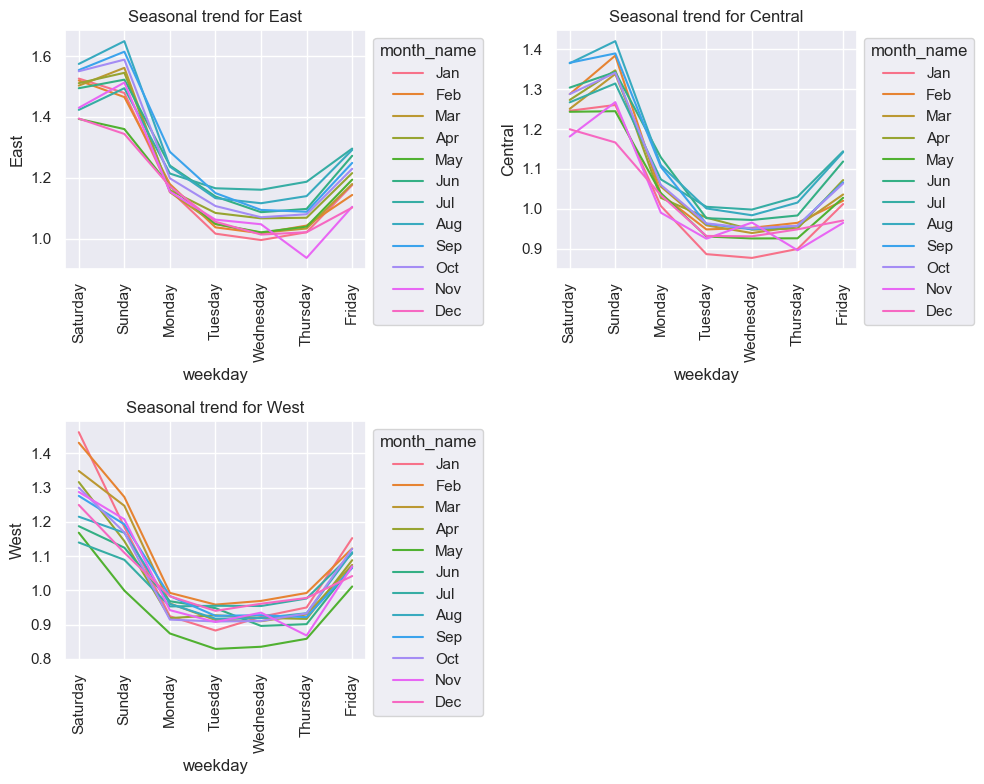

In [52]:
# Regional plots over the week 
plot_seasonal("weekday", region_ls, "month_name", df_region_temp, 2, 2, 10, 8)

We see from above that for all regions, sales are higher for the Saturdays, but on Sunday, there is a drop in the West region, while the maintain high in the East and Central regions.

## 3. <a id='toc3_'></a>[Simple (Naive and Others) and ETS Models](#toc0_)

Before we try Error-Trend-Seasonality (ETS), ARIMA and Light Gradient Boosting Machine (LGBM) Models for forecasting, we want a benchmark to compare our forecast RMSE values with. Furthermore, baseline naive models sometimes perform better than expected. 

Overall, our best results per the kaggle score were:
- window average with window size = 21 (2.27)
- window size = 28 (2.28)
- window size = 14 (2.29)
- holt winters (season = 7) (2.29)
- window size = 12 (2.30)

Creating new dataframes for section 3 and cleaning data types:

In [4]:
# Reading dataframes for section 3
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_sample_sub = pd.read_csv(SAMPLE_CSV_PATH)
df_cal = pd.read_csv(CAL_CSV_PATH)

In [5]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_sample_sub = pd.read_csv(SAMPLE_CSV_PATH)
df_cal = pd.read_csv(CAL_CSV_PATH)

# Merge d to get dates
df_dates = pd.DataFrame(columns = ["d"], data = df_train.columns[6:])
df_dates = df_dates.merge(df_cal[["date", "d"]], on = "d", how = "left")

# Convert to appropriate datatypes
df_dates["d"] = df_dates["d"].astype("string")
df_dates["date"] = pd.to_datetime(df_dates["date"])

string_features = ["id", "item_id", "subcat_id", "category_id", "store_id", "region_id"]
for f in string_features :
    df_train[f] = df_train[f].astype("string")

df_cal["date"] = pd.to_datetime(df_cal["date"])
df_cal["weekday"] = df_cal["weekday"].astype("string")
df_cal["d"] = df_cal["d"].astype("string")
df_cal["wm_yr_wk"] = df_cal["wm_yr_wk"].astype(int)

dates_dict = dict(zip(list(df_dates["d"]), list(df_dates["date"])))
df_train_dates = df_train.rename(dates_dict, axis = 1)

df_naive_train = df_train_dates[["id"] + list(df_train_dates.columns[6:])].melt(id_vars = ["id"], var_name= "ds", value_name = "y")
df_naive_train = df_naive_train.rename(columns = {"id":"unique_id"})

### 3.1 Forecasting with naive models

For each model, we recorded the performance using 2 methods, 
- the first was RMSE on a 80/20 split, 
- the second was training on the entire train.csv and producing a 21 day forecast, and capturing the RMSE from kaggle.

The train / test set split was from train.csv split at 2015-01-29, since estimated to provide a 80/20 split given the range of dates.

In [6]:
# Find 80% split point between the start and end points of train dataset
end_date = df_naive_train["ds"].iloc[-1] 
start_date = df_naive_train["ds"].iloc[0] 
split_date = (end_date - start_date) * 0.8 + start_date

# Split into train and validation sets
train = df_naive_train.loc[df_naive_train['ds'] < split_date]
valid = df_naive_train.loc[(df_naive_train['ds'] >= split_date)]

# Number of forecast steps for 20% forecast test
h = valid['ds'].nunique()

### 3.1.1 Forecasting with WindowAverage (for window sizes of 12, 14, 21, 28)

Best model overall for our team, with window average = 21 the best performing (kaggle score = 2.27) across the different window sizes. We compared WindowAverage with other naive models such as naive, seasonal naive, and seasonal window average (predictions were compared using the Kaggle score). In the interests of keeping the notebook short, the code for these other models are not reproduced here. We only present the code for the best model below, along with the scores for the other window sizes.

WindowAverage might be the best compared to SARIMA or ML because it is computationally less intensive than the other methods, and makes it able to train on the entire dataset. 

However, not sure why WindowAverage outperforms the other seasonal models, when in fact we would expect the seasonal models to better capture the seasonality we detected in the EDA. This is worth further investigation.

In [ ]:
wa_12 = StatsForecast(models=[WindowAverage(window_size=12)],
                      freq='D', n_jobs=-1)

wa_14 = StatsForecast(models=[WindowAverage(window_size=14)],
                      freq='D', n_jobs=-1)

wa_21 = StatsForecast(models=[WindowAverage(window_size=21)],
                      freq='D', n_jobs=-1)

wa_28 = StatsForecast(models=[WindowAverage(window_size=28)],
                      freq='D', n_jobs=-1)

We trained each model with varying window sizes on the entire train csv and produced a forecast for each model for the next 21 days (uncomment lines to export csv)

NOTE: Takes about 6 mins to run the below chunk of code. 

In [ ]:
wa_12_pred = wa_12.forecast(h=21, df = df_naive_train)
wa_12_pred = wa_12_pred.reset_index()
wa_12_pred = convert_to_sub_csv(wa_12_pred, df_sample_sub, "WindowAverage")
# wa_12_pred.to_csv(EXPORT_PATH+"/naive_models/wa_12.csv", header=True, index=False)

wa_14_pred = wa_14.forecast(h=21, df = df_naive_train)
wa_14_pred = wa_14_pred.reset_index()
wa_14_pred = convert_to_sub_csv(wa_14_pred, df_sample_sub, "WindowAverage")
# wa_14_pred.to_csv(EXPORT_PATH+"/naive_models/wa_14.csv", header=True, index=False)

wa_21_pred = wa_21.forecast(h=21, df = df_naive_train)
wa_21_pred = wa_21_pred.reset_index()
wa_21_pred = convert_to_sub_csv(wa_21_pred, df_sample_sub, "WindowAverage")
# wa_21_pred.to_csv(EXPORT_PATH+"/naive_models/wa_21.csv", header=True, index=False)

wa_28_pred = wa_28.forecast(h=21, df = df_naive_train)
wa_28_pred = wa_28_pred.reset_index()
wa_28_pred = convert_to_sub_csv(wa_28_pred, df_sample_sub, "WindowAverage")
# wa_28_pred.to_csv(EXPORT_PATH+"/naive_models/wa_28.csv", header=True, index=False)

We then compared performance of the models using RMSE to forecast for 20% of the test dataset.

NOTE: Takes about 8m to run the code chunk below

In [ ]:
df_wa_12 = wa_12.forecast(h = h, df = train)
df_wa_12 = df_wa_12.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

df_wa_14 = wa_14.forecast(h = h, df = train)
df_wa_14 = df_wa_14.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

df_wa_21 = wa_21.forecast(h = h, df = train)
df_wa_21 = df_wa_21.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

df_wa_28 = wa_28.forecast(h = h, df = train)
df_wa_28 = df_wa_28.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

We can see that RMSE gradually decreases with increasing window sizes. Testing on greater window sizes beyond 28 increases Kaggle RMSE (graph in presentation slide 20).
So the ideal window length is about 21 - 28.

In [ ]:
print_rmse(df_wa_12["y"], df_wa_12["WindowAverage"])
print_rmse(df_wa_14["y"], df_wa_14["WindowAverage"])
print_rmse(df_wa_21["y"], df_wa_21["WindowAverage"])
print_rmse(df_wa_28["y"], df_wa_28["WindowAverage"])

2.777953544392085
2.7284115552768027
2.6655059744910456
2.6392974023341615


### 3.2 ETS (Error Trend Seasonality) model: HoltWinters (season length = 7)
ETS models have been around for a while, since the 1960s. However, they are still relevant today and may perform well. By varying the specification of the 3 components (E, T, S), we can obtain different ETS models that perform starkly different.

Performed second best overall compared to the rest of the modelling techniques (i.e. SARIMA, ML modelling) and WindowAverage.

However, due to the computational cost, the training was done on only on 50% of the dataset.

We also tried other ETS models, such as simple exponential smoothing, and seasonal exp. smoothing, but they were not as good as HoltWinters, so we didn't report them in this notebook.

In [12]:
# Subset the last 50% of the time series because of computation
df_naive_train = df_naive_train.set_index("ds")
df_naive_train = df_naive_train.sort_index()
df_naive_train["ds"] = df_naive_train.index

# Find midpoint
midpoint = start_date + ((end_date - start_date) / 2)

# Split into train and validation, from midpoint onwards
df_naive_train_subset = df_naive_train.loc[midpoint:]

# find date to split, 80% of subset
test_split_date = ((end_date - midpoint) * 0.8) + midpoint

# Reset index of train dataset
df_naive_train_subset = df_naive_train_subset.drop("ds", axis = 1)
df_naive_train_subset = df_naive_train_subset.reset_index()

# Split by date
train = df_naive_train_subset.loc[df_naive_train_subset['ds'] < test_split_date]
valid = df_naive_train_subset.loc[(df_naive_train_subset['ds'] >= test_split_date)]

h = valid['ds'].nunique()

We chose to use the last 20% of the 50% split to train HoltWinters because running on the entire 50% split took longer than 30 mins. 

NOTE: below code chunk took 12.5 mins to run.

In [ ]:
holt_winters = StatsForecast(models=[HoltWinters(season_length=7)],
                      freq='D', n_jobs=-1)

# Use the last 20% to train. 
holt_winters_pred = holt_winters.forecast(h = 21, df = valid)

In [ ]:
holt_winters_pred = holt_winters_pred.reset_index()
holt_winters_sub = convert_to_sub_csv(holt_winters_pred, df_sample_sub, "HoltWinters")
# holt_winters_sub.to_csv("../submissions/naive_models/holt_winters.csv", index = False)

### 3.3 Comparing other baseline models (NOTE: these are not the top submissions, placed here just for reference)
With Naive, SeasonalNaive, WindowAverage, Seasonal Window Average models
- Testing for different seasons and window sizes (multiples of 7, because that was the seasonality we detected in the EDA)

Overall looking at the RMSE below, the naive model seemed to perform the best, followed by seasonal window average, then seasonal naive. 

It is strange that if naive method performed the best, we would presumse that seasonal naive would be better, or at least be 2nd place. More work could be done in EDA on the predictions to compare the trends and descriptive statistics to see whether the predictions are in line with the train set.

In [ ]:
model = StatsForecast(models=[Naive(), 
                              SeasonalNaive(season_length=7), 
                              SeasonalWindowAverage(window_size=2, season_length=7)],
                      freq='D', n_jobs=-1)

p = model.fit_predict(h=h, df = train)
p = p.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
p.head()

unique_id         ds  Naive  SeasonalNaive  SeasWA  y
0  Beauty_1_001_Central_1 2015-10-22    1.0            0.0     0.0  0
1  Beauty_1_001_Central_1 2015-10-23    1.0            0.0     0.5  0
2  Beauty_1_001_Central_1 2015-10-24    1.0            1.0     0.5  0
3  Beauty_1_001_Central_1 2015-10-25    1.0            0.0     0.5  0
4  Beauty_1_001_Central_1 2015-10-26    1.0            0.0     0.0  0

In [ ]:
print(np.sqrt(mean_squared_error(valid["y"], p["Naive"])))
print(np.sqrt(mean_squared_error(valid["y"], p["SeasonalNaive"])))
print(np.sqrt(mean_squared_error(valid["y"], p["SeasWA"])))

4.5222606586103105
4.96096247060974
4.886322395297068


In [ ]:
model_2 = StatsForecast(models=[SeasonalNaive(season_length=14), 
                              SeasonalWindowAverage(window_size=2, season_length=14)],
                      freq='D', n_jobs=-1)

p_2 = model_2.fit_predict(h=h, df = train)
p_2 = p_2.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
p_2.head()

unique_id         ds  SeasonalNaive  SeasWA  y
0  Beauty_1_001_Central_1 2015-10-22            0.0     0.0  0
1  Beauty_1_001_Central_1 2015-10-23            1.0     1.0  0
2  Beauty_1_001_Central_1 2015-10-24            0.0     0.5  0
3  Beauty_1_001_Central_1 2015-10-25            1.0     1.0  0
4  Beauty_1_001_Central_1 2015-10-26            0.0     0.0  0

In [ ]:
print(np.sqrt(mean_squared_error(valid["y"], p_2["SeasonalNaive"])))
print(np.sqrt(mean_squared_error(valid["y"], p_2["SeasWA"])))

5.07329627993835
4.862353096961041


### 3.4. <a id='toc3_3_'></a>[Review of Simple and ETS Models and Future Work](#toc0_)

We tried many models in Section 3, from different types of naive models, seasonal naive models, varying window sizes, seasonal lengths and levels of differencing. WindowAverage (WA) models consistently performed the best compared to others, though with more data, Holt-Winter's model may be able to surpass Window Average, as currently the Holt-Winter's model here is only using the last 10% (0.5 * 0.2 = 0.1) of train data to produce its 21 day forecast.

Though for some reason seasonal models performed worse compared to WA, the increasing performance by increasing window length by multiples of 7 until 21 - 28 suggests that some seasonality is still captured by the model.

Ultimately, the ETS models performed much better than the naive models when comparing accuracy by the Kaggle score (RMSE). The RMSE scores we achieved through many variations of ETS models shows the power of the ETS methods and proves why it continues to be used in forecasting problems today.

However, we do aim for better forecasts, hoping that ARIMA models and Machine Learning Models can beat these forecasts.

Further work:

- Test the same models with differenced data. If we make time series stationary, perhaps window average would be even better because model does not account for seasonality. However, seasonal models may also perform better because even though the data could be differenced by 7, there could be some seasonality for the next 7 days which may be better captured by seasonal models.
- Investigate why seasonal models did not perform better than non-seasonal models, even when accounting for different windows and season sizes. If the data was seasonal, we would assume that seasonal models would do better than non-seasonal models.
- EDA could be conducted to compare the variance and trending of the predictions given by each model, to assess if the predictions are following the trend of the existing data. Though a model may have a higher RMSE, if the trending / seasonality of the predicted data better fits the train data, perhaps it is an issue of using more data points to train the model rather than the model itself not being suitable for prediction.
- There were also some other naive models that we didn't try, such as historic average, or auto ETS. Auto ETS would be much more computationally intensive than WindowAverage, and as we have seen, even HoltWinters didn't give better performance than WindowAverage, even though it took more than 20 times longer to train.

## 4. <a id='toc4_'></a>[Autoregressive Integrated Moving Average (ARIMA) Modelling](#toc0_)

ARIMA models are not new methods, having been developed in the 1970s. However, they are extremely popular and are widely used for forecasting problems, perhaps due to its methodology being rather intuitive. ARIMA models are based on the concept that the current value of a time series can be expressed as a function of its past values (the *AR* component) and errors (the *MA* component). 

ARIMA models can also deal with non-stationary series by taking the difference of the time series by multiple levels -- this refers to the *Integration* component. This means subtracting a previous value of the time series from its current value. 

Despite the popularity and intuitive concepts of the ARIMA models, these set of models did not perform very well for us, with Kaggle scores higher than 3.5, even when we tried forecasting on different sub groups of the data (i.e. product category and region), and factored in the seasonality into SARIMA with m = 7. 

These models were trained using the mean number of units sold across all items, so that instead of 30K items to predict for each time point, we only needed for 1 item (the mean items across 30k items) for each time point. This helped with running the models on the entire time period, however it probably impacted performance of the model significantly since it is very difficult to assume 1 time series can effectively act as a proxy for 30K individual time series.

In [13]:
# Reading datasets for Section 4
df_train = pd.read_csv(TRAIN_CSV_PATH)

# Convert to appropriate datatypes
df_train["id"] = df_train["id"].astype("string")
df_train["item_id"] = df_train["item_id"].astype("string")
df_train["subcat_id"] = df_train["subcat_id"].astype("string")
df_train["category_id"] = df_train["category_id"].astype("string")
df_train["store_id"] = df_train["store_id"].astype("string")
df_train["region_id"] = df_train["region_id"].astype("string")

df_cal = pd.read_csv(CAL_CSV_PATH)
df_cal.head()

# Change dtypes
df_cal["date"] = pd.to_datetime(df_cal["date"])
df_cal["weekday"] = df_cal["weekday"].astype("string")
df_cal["d"] = df_cal["d"].astype("string")
df_cal["wm_yr_wk"] = df_cal["wm_yr_wk"].astype(int)

# Add column with months in string
month_names_ls = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_int_ls = list(range(1, 13))
month_names_dict = {month_int_ls[i]: month_names_ls[i] for i in range(len(month_int_ls))}

df_cal["month_name"] = df_cal["month"].replace(month_names_dict)

# Save day IDs from train
day_ids = list(df_train.columns[6:])

df_items_temp = df_train[["id"]+day_ids].T
df_items_temp.columns = df_items_temp.iloc[0, :]

# Drop first row
df_items_temp = df_items_temp.iloc[1: , :]

# Copy the index to merge date
df_items_temp["d"] = df_items_temp.index

# Merge date into df
df_items_temp = pd.merge(df_items_temp, df_cal, on = "d", how = "left")
df_items_temp = df_items_temp.set_index("date")

# Calculate average items across items per day
df_items_temp["avg_items_sold"] = df_items_temp[list(df_train["id"])].mean(axis = 1)

df_items_temp.head()

Beauty_1_001_East_1 Beauty_1_002_East_1 Beauty_1_003_East_1  \
date                                                                     
2011-01-29                   0                   0                   0   
2011-01-30                   0                   0                   0   
2011-01-31                   0                   0                   0   
2011-02-01                   0                   0                   0   
2011-02-02                   0                   0                   0   

           Beauty_1_004_East_1 Beauty_1_005_East_1 Beauty_1_006_East_1  \
date                                                                     
2011-01-29                   0                   0                   0   
2011-01-30                   0                   0                   0   
2011-01-31                   0                   0                   0   
2011-02-01                   0                   0                   0   
2011-02-02                   0                   0                   0   

           Beauty_1_007_East_1 Beauty_1_008_East_1 Beauty_1_009_East_1  \
date                                                                     
2011-01-29                   0                  12                   2   
2011-01-30                   0                  15                   0   
2011-01-31                   0                   0                   7   
2011-02-01                   0                   0                   3   
2011-02-02                   0                   0                   0   

           Beauty_1_010_East_1  ... Food_3_826_West_3 Food_3_827_West_3    d  \
date                            ...                                            
2011-01-29                   0  ...                 0                 0  d_1   
2011-01-30                   0  ...                 0                 0  d_2   
2011-01-31                   1  ...                 0                 0  d_3   
2011-02-01                   0  ...                 0                 0  d_4   
2011-02-02                   0  ...                 0                 0  d_5   

           wm_yr_wk    weekday wday month  year month_name avg_items_sold  
date                                                                       
2011-01-29    11101   Saturday    1     1  2011        Jan       1.070220  
2011-01-30    11101     Sunday    2     1  2011        Jan       1.041292  
2011-01-31    11101     Monday    3     1  2011        Jan       0.780026  
2011-02-01    11101    Tuesday    4     2  2011        Feb       0.833454  
2011-02-02    11101  Wednesday    5     2  2011        Feb       0.627944  

[5 rows x 30498 columns]

### 4.1. <a id='toc4_1_'></a>[Finding the Number of Differences](#toc0_)

#### 4.1.1. <a id='toc4_1_1_'></a>[ACF and PACF Plots](#toc0_)

In the code chunk above, we created the average number of items sold per day. We want to see what level of differencing is best and we can do this by making plots after differencing, ACF and PACF plots. We would like to see no clear trend in the points after differencing and no obvious patterns, we would like to see no significant autocorrelations and no significant partial autocorrelations as well.

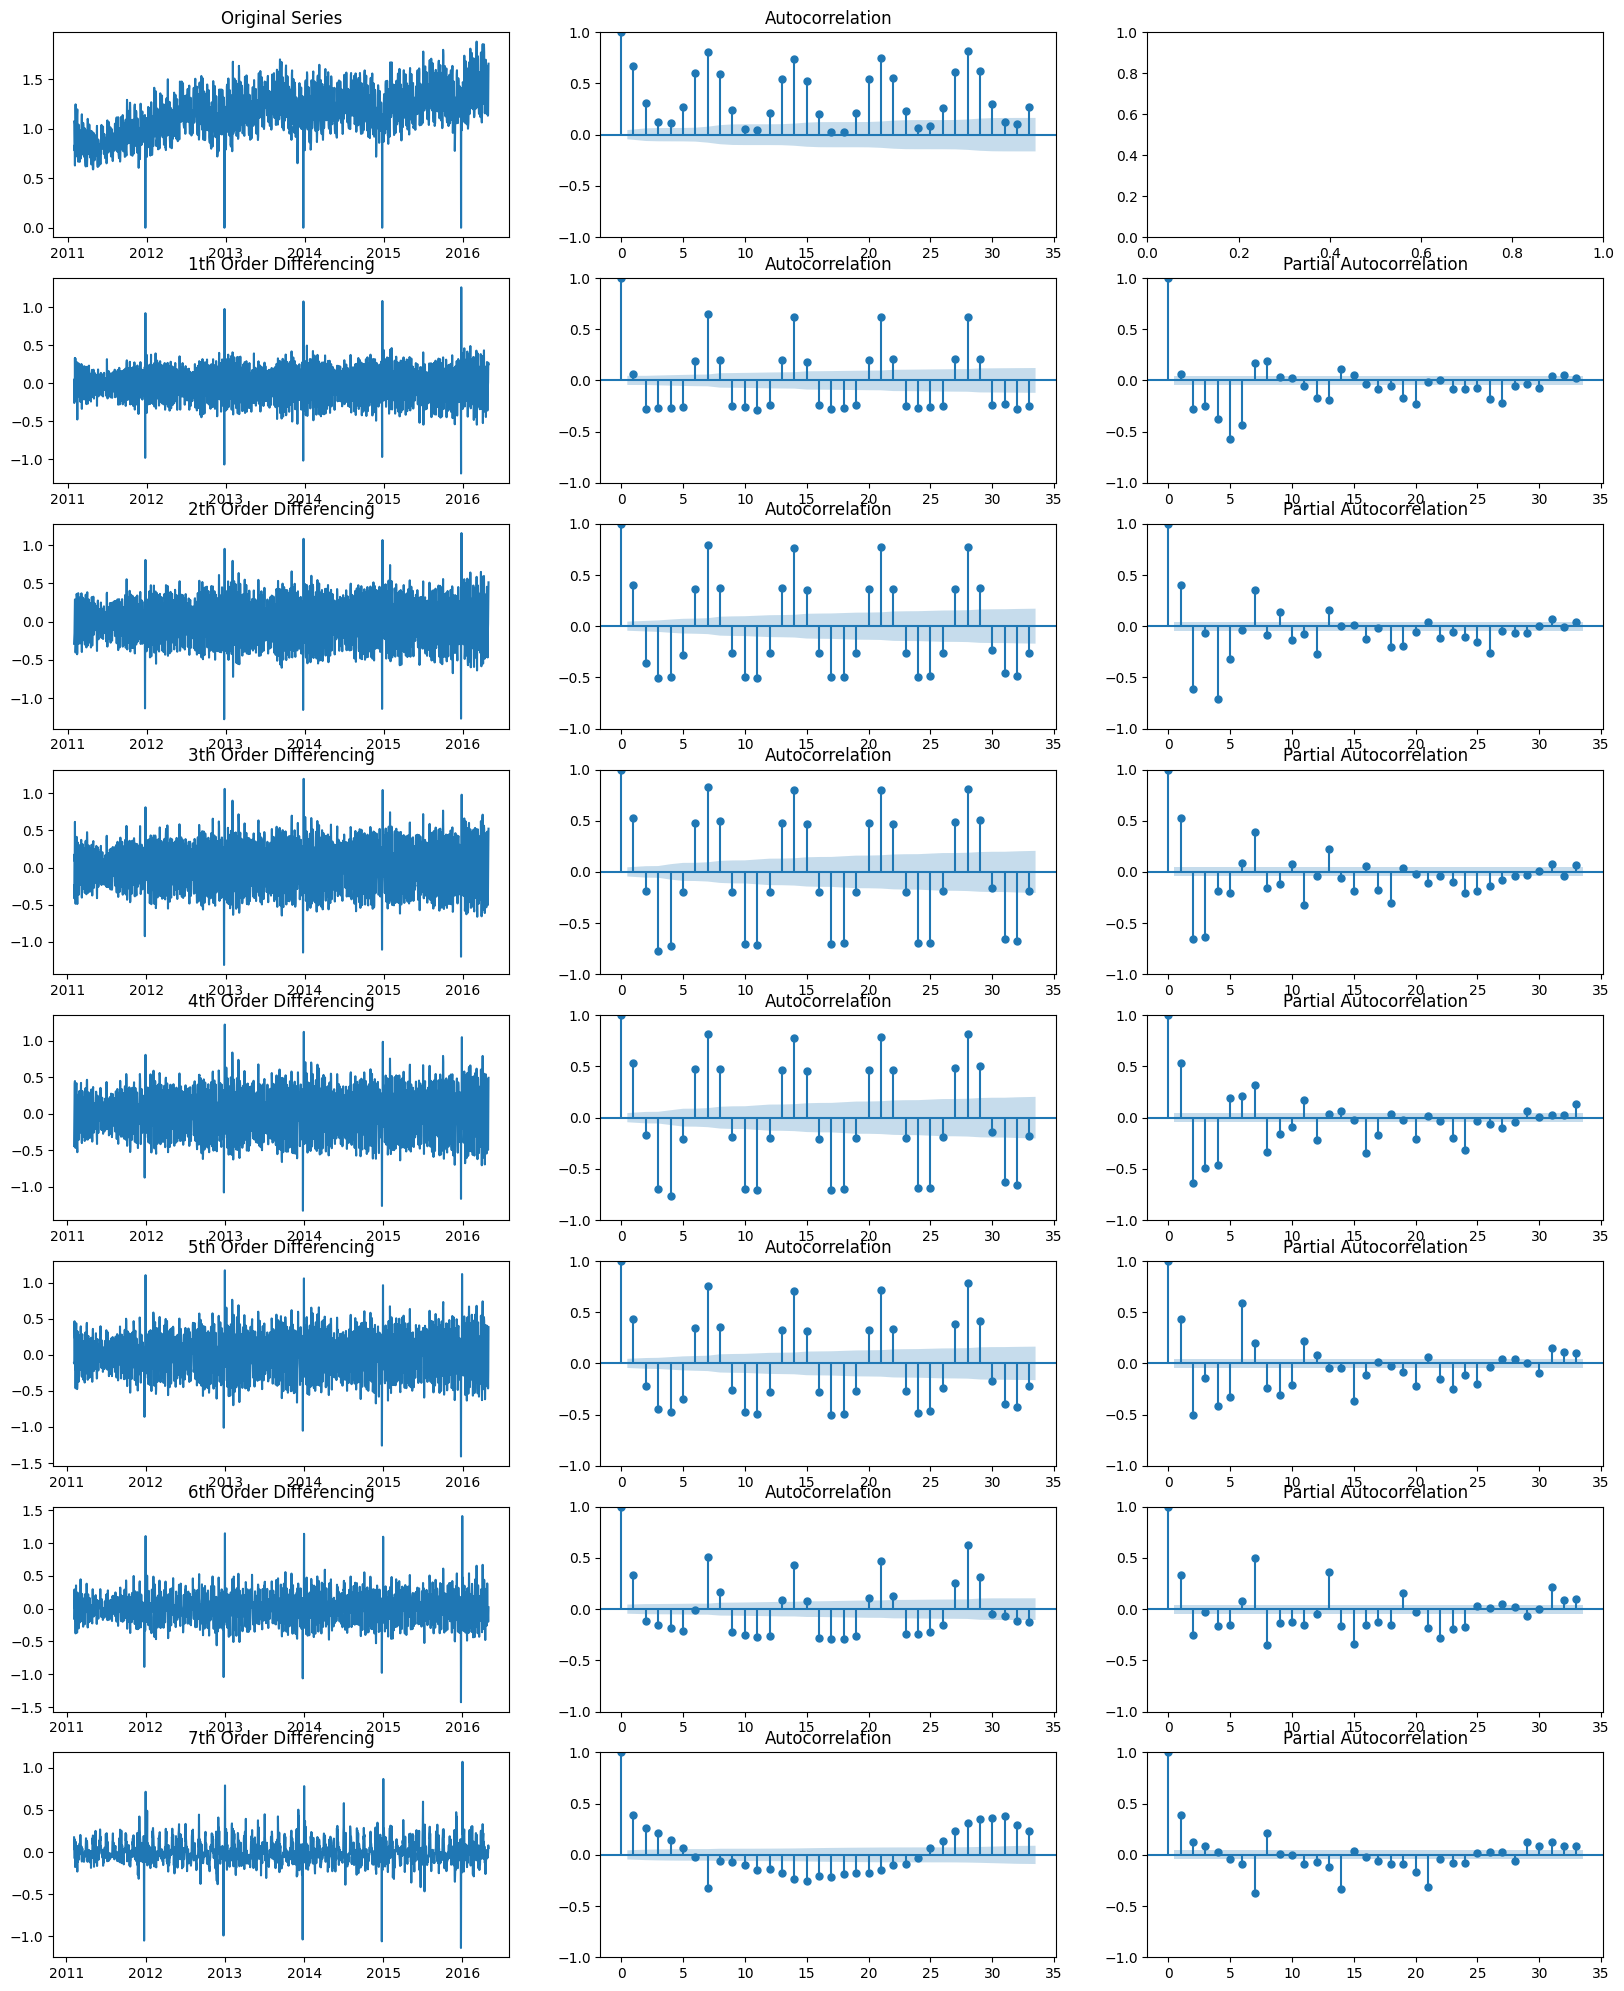

In [14]:
plot_differencing(df_items_temp["avg_items_sold"])

From the plots above, we see that after the first difference, the plots have no more upward trend. However, we do see lots of significant autocorrelations in the ACF plots and PACF plots until the 7th order differencing. In the 7th order differencing, we still do have significant autocorrelations, but to a much smaller extent. It is worth noting that our ACF plot at the 7th order difference has a sinuisoidal shape, which may indicate some kind of seasonality that has not been accounted for, and it would be good to have a seasonal component in our specification later.

Having brought attention to the 7th-differenced series, we want to be thorough and continue until the 16-th difference. This is 2 differences after 14, which is 2 days after a fortnight.

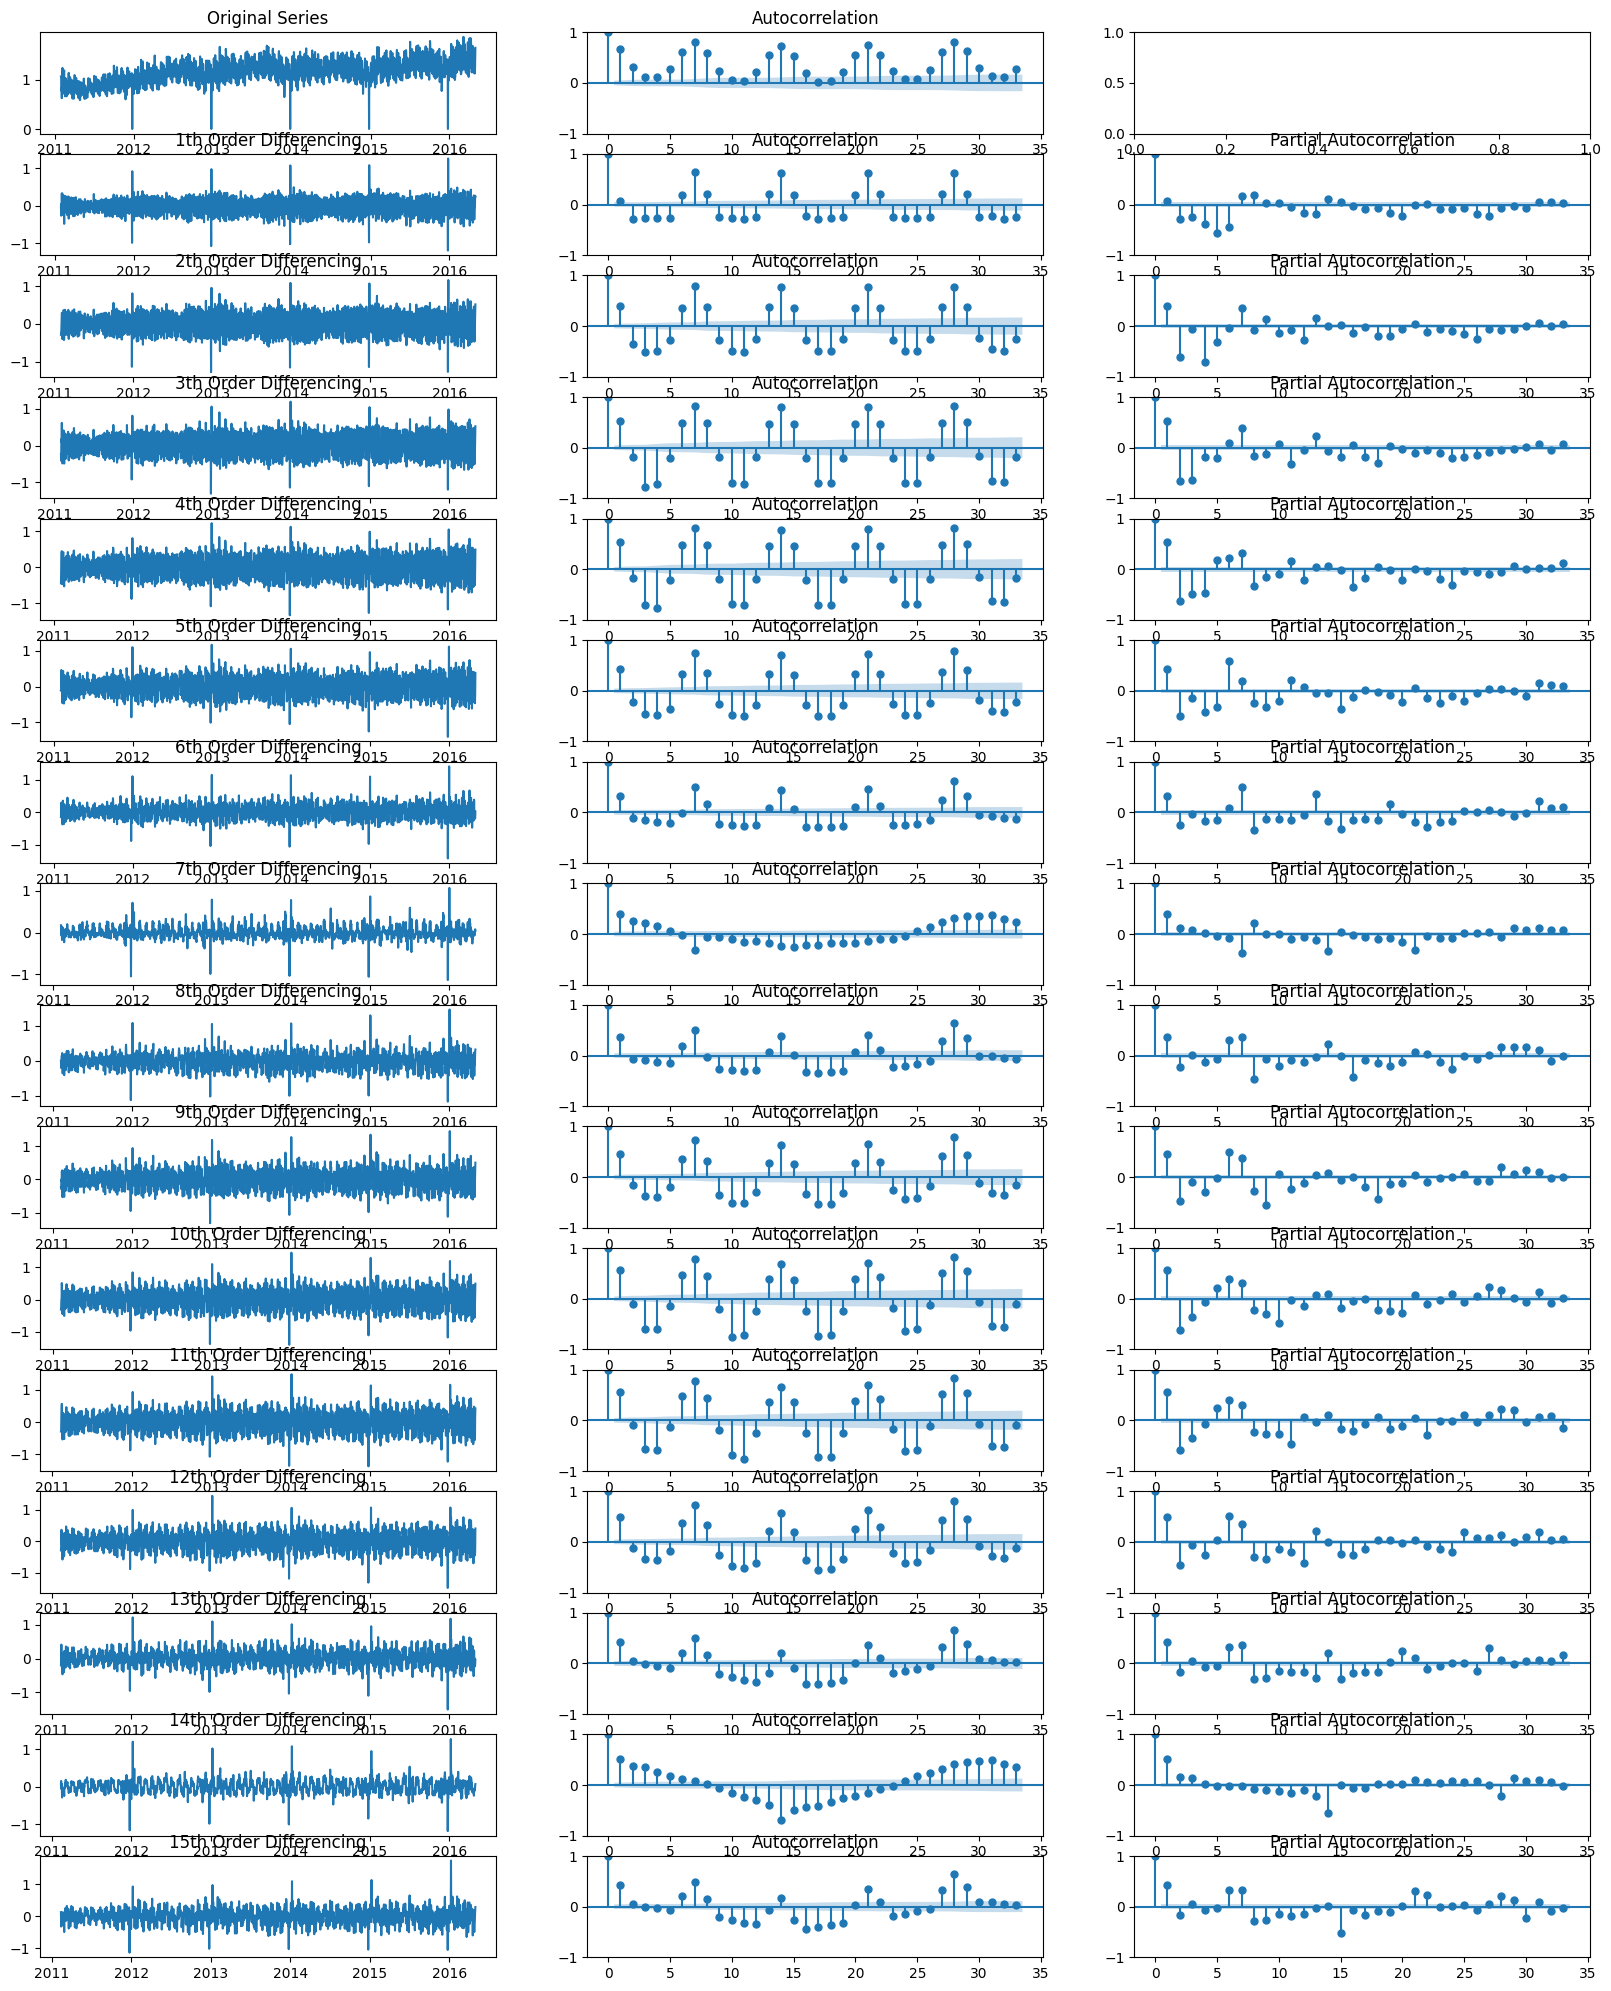

In [15]:
plot_differencing(df_items_temp["avg_items_sold"], n = 16)

From these plots, we see that after the 8th-difference, we get large autocorrelations in the plots again, which is undesirable. We do note that the 8th-difference series does not have large autocorrelations. We do see a similar sinuisoidal shape in the 14-th order differencing, which reinforces our hypothesis of seasonality being based on a week (since a fortnight is a multiple of a week).

Formulating hypothesis for paramters:
- m = 7 (seasonality)
- p = 3 (according to PACF at lag 7, where at the 4th lag, the correlation was insignificant. So the previous lag = 3 would be a rough estimate for the AR component)
- q = 4 (according to ACF at lag 7, where at the 5th lag, the correlation was insiginificant. So the previous lag = 4 would be a rough estimate for the MA component)

We chose to keep d, P, D, Q at the default of 1, to first inspect the performance of the model before making any changes.

#### 4.1.2. <a id='toc4_1_2_'></a>[Stationarity Tests after Differencing (ADF and KPSS)](#toc0_)

Now we would like to examine how the 7-th differenced series fares on the ADF and KPSS tests, to investigate if stationarity is present statistically.

In [16]:
adf_test(df_items_temp["avg_items_sold"].diff(periods = 7).dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -20.958364
p-value                           0.000000
#Lags Used                       23.000000
Number of Observations Used    1888.000000
Critical Value (1%)              -3.433818
Critical Value (5%)              -2.863072
Critical Value (10%)             -2.567586
dtype: float64


In [17]:
kpss_test(df_items_temp["avg_items_sold"].diff(periods = 7).dropna())

Results of KPSS Test:
Test Statistic            0.008453
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


As in the EDA (Section 2.7), we interpret the p-value from the two tests. However, as compared to in Section 2.7, we can reject the null hypothesis of the ADF test as our p-value is 0.00, which is smaller than conventional significance levels of 0.05. We also cannot reject the null hypothesis of the KPSS test by the same significance level. In the former case, we can reject the null hypothesis that the series is non-stationary and in the latter case, we cannot reject that the series is stationary. This suggests our series is stationary after the 7-th difference and can be modelled by the ARIMA method.

### 4.2. <a id='toc4_2_'></a>[Testing ARIMA Model using Average Number of Items Sold](#toc0_)

First we tried fitting a SARIMA model on the mean items sold per day on the entire dataset (instead of per item per day to reduce computation) to capture some baseline performance

Looking at the SARIMA summary below, the only non statistically significant coefficient was MA1, but the rest of the coefficients are significant. Perhaps there could be some seasonal order of P, D, Q that we could consider trying different combinations of in future work. Other than this anomaly, it seems that the hypothesis of the parameters we inferred from the ACF and PACF plots are validated. Later on we tried using auto SARIMA to generate better parameters.

In [18]:
x = df_items_temp["avg_items_sold"]

model = ARIMA(x, order = (3, 1, 4), seasonal_order=(1,1,1,7))
fitted = model.fit()

print(fitted.summary())

c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                     
Dep. Variable:                    avg_items_sold   No. Observations:                 1919
Model:             ARIMA(3, 1, 4)x(1, 1, [1], 7)   Log Likelihood                1605.472
Date:                           Sun, 30 Apr 2023   AIC                          -3190.943
Time:                                   16:13:32   BIC                          -3135.389
Sample:                               01-29-2011   HQIC                         -3170.498
                                    - 04-30-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6485      0.076     -8.584      0.000      -0.797      -0.500
ar.L2          0.2844      0.073      3.875

#### 4.2.1. <a id='toc4_2_1_'></a>[Residuals Plot](#toc0_)
Plot shows that the variance of the residuals seem quite constant, other than more granular seasonal spikes especially at the end of each year where the stores close.

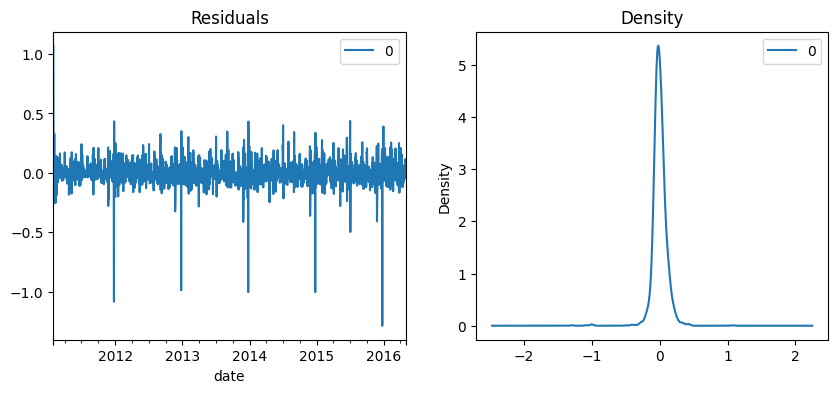

In [19]:
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2, figsize = (10, 4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#### 4.2.2. <a id='toc4_2_2_'></a>[Actual Values vs Fitted Predictions](#toc0_)
Generally the model seems to follow the trend of the actual values, though the 95% CI is quite broad, which could mean that the model may not be as effective as visualised here.

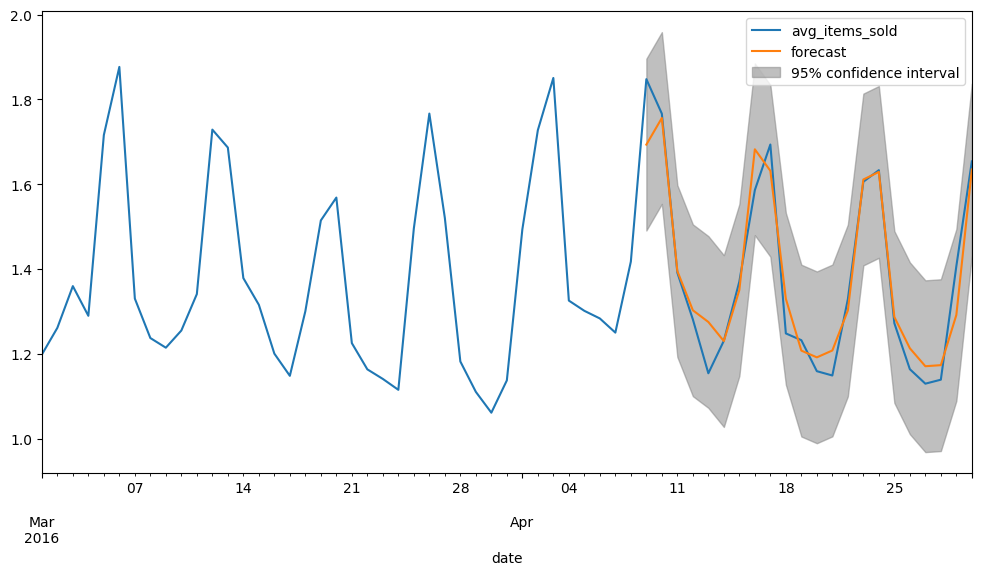

In [20]:
# Actual vs Fitted
fig, ax = plt.subplots(figsize = (12, 6))

# Compare predictions for the last 21 days of the training set
ax = df_items_temp["avg_items_sold"].loc["2016-03-01" : "2016-04-30"].plot(ax=ax)

# Predict until last day
plot_predict(fitted, "2016-04-09", "2016-04-30", ax = ax)
plt.show()

In [21]:
# Obtaining RMSE 
preds = fitted.get_prediction("2016-04-10", "2016-04-30")
rmse = np.sqrt(mean_squared_error(df_items_temp.loc["2016-04-10":"2016-04-30"]["avg_items_sold"], preds.predicted_mean))
print(rmse)

0.053642928899535806


### 4.3. <a id='toc4_3_'></a>[Forecasting with ARIMA for the last 21 Days of the train Dataset](#toc0_)
Using 80% of the data to train, then testing on a forecast of the next 21 days after the 80% split. We test using a 21 days prediction because the required submission is 21 days, so this hopefully could give some benchmark performance.

In [22]:
# Set number of days to forecast into the future
n = 21

# Split into test and train, training up till the last n - 1th day and predict the last n days
x_train, x_test = x[0:len(x)-n], x[len(x) - n:]

# Build Model
model = ARIMA(x_train, order = (3, 1, 4), seasonal_order=(1,1,1,7))
fitted = model.fit()

# Forecast n days ahead
fc = fitted.forecast(n) 

# Make as pandas series
fc_series = pd.Series(fc, index=df_items_temp["avg_items_sold"][len(x) - n:].index)

print(fitted.summary())

c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                     
Dep. Variable:                    avg_items_sold   No. Observations:                 1898
Model:             ARIMA(3, 1, 4)x(1, 1, [1], 7)   Log Likelihood                1585.211
Date:                           Sun, 30 Apr 2023   AIC                          -3150.422
Time:                                   16:13:41   BIC                          -3094.979
Sample:                               01-29-2011   HQIC                         -3130.006
                                    - 04-09-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7003      0.075     -9.329      0.000      -0.847      -0.553
ar.L2          0.1991      0.088      2.271

#### 4.3.1. <a id='toc4_3_1_'></a>[Actual Values vs Fitted Predictions](#toc0_)
Actual values are plotted in blue while fitted predictions are plotted in orange.
Similarly to the 80/20 split above, generally the model seems to follow the trend of the actual values for the next 21 days, though the forecasted values does not go as low as the actual values.

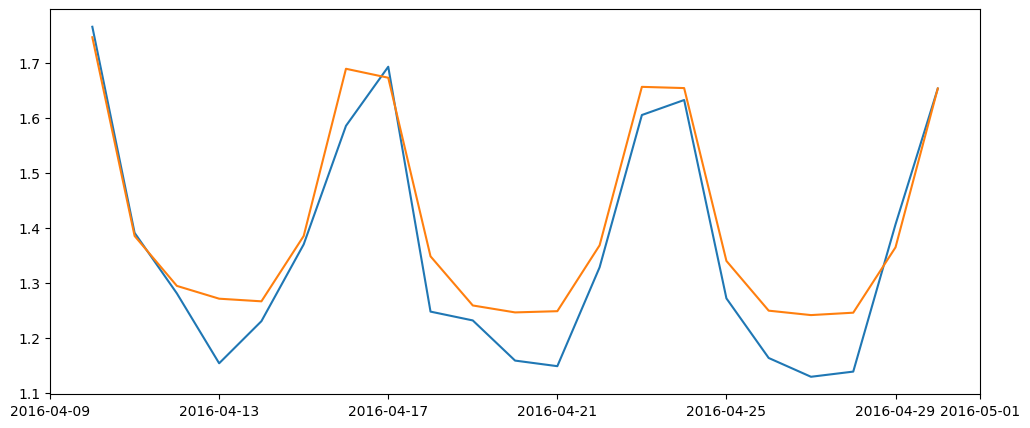

In [23]:
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(x_train, label='training')
plt.plot(x_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.show()

Also comparing RMSE of when testing on the 21 days of forecast vs the 20% forecast above, the RMSE only had a difference of 0.01, which was quite insignificant. Perhaps we could infer that the model could capture both broader and narrower trends, because while the number of days of forecast varied greatly, RMSE was around the same value.

In [24]:
rmse = np.sqrt(mean_squared_error(x_test, fc_series))
print(rmse)

0.06837909782312342


### 4.4. <a id='toc4_4_'></a>[Simple ARIMA Forecast: Training Using the Mean Across All Items of Each Day in the `train` Dataset](#toc0_)

Forecast all 21 days at once and assign predictions to all the items for all days. This assumes that every item would sell the same number because the training data only contained 1 time series instead of one model per item.

Kaggle score: 3.82, which was the poorest score we got out of the other models we tried (i.e. ML, naive methods)

In [25]:
# Build Model -  just average items sold first
model = ARIMA(df_items_temp["avg_items_sold"], order = (3, 1, 4), seasonal_order=(1,1,1,7))
fitted = model.fit()

print(fitted.summary())

c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                     
Dep. Variable:                    avg_items_sold   No. Observations:                 1919
Model:             ARIMA(3, 1, 4)x(1, 1, [1], 7)   Log Likelihood                1605.472
Date:                           Sun, 30 Apr 2023   AIC                          -3190.943
Time:                                   16:13:49   BIC                          -3135.389
Sample:                               01-29-2011   HQIC                         -3170.498
                                    - 04-30-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6485      0.076     -8.584      0.000      -0.797      -0.500
ar.L2          0.2844      0.073      3.875

In [26]:
# Forecast n days ahead
fc = fitted.forecast(21) 
pred_time_period = pd.date_range(start = "2016-05-01", periods = 21)

# Make as pandas series
fc_series = pd.Series(fc).round().astype(int)

# Assign to all items
df_sample_sub = pd.read_csv(SAMPLE_CSV_PATH)
df_sample_sub.iloc[:,1:] = fc_series.values

In [27]:
# For export and upload to Kaggle 
## df_sample_sub.to_csv(EXPORT_PATH+"/submission_1.csv", header=True, index=False)

### 4.5. <a id='toc4_5_'></a>[Using AUTOARIMA (On Product Category Level)](#toc0_)
Perhaps the performance above was due to poor parameter choices as we only inferred them from the ACF / PACF plots. Hence, to get a better indicator of the parameters to use for sarima, we first tried fitting autoarima on the averaged items sold, grouped by product category and producing forecasts on 20% of training set. Before doing this, we first aggregated data at product category level before forecasting.

In [28]:
# Group the data by store and item_id
df_category_grp = df_train.groupby(['category_id'], as_index=False).mean()

# Create datetime df matching to the day index
df_dates = pd.DataFrame(columns = ["d"], data = df_train.columns[6:])
df_dates = df_dates.merge(df_cal[["date", "d"]], on = "d", how = "left")

# Split into separate series, 1 for each category
s_beauty = pd.Series(list(df_category_grp.iloc[0,1:]), index = df_dates["date"])
s_food = pd.Series(list(df_category_grp.iloc[1,1:]), index = df_dates["date"])
s_cleaning = pd.Series(list(df_category_grp.iloc[2,1:]), index = df_dates["date"])

# Train test split
train, test = train_test_split(s_beauty, train_size=0.8)

# Save item indices for assigning predictions to the three product categories after forecasting
beauty_idx = df_train[df_train["category_id"] == "Beauty"].index
food_idx = df_train[df_train["category_id"] == "Food"].index
cleaning_idx = df_train[df_train["category_id"] == "Cleaning"].index

Here we fitted both ARIMA and SARIMA (seasonality = 7) to compare the performance. For both, we used a random grid search instead of the greedy stepwise algorithm for computational efficiency.

Looking at the summary, the AIC of SARIMA (-4117) was more negative than ARIMA (-3596), which gives us an indication that SARIMA is a btter model. Further, the coefficients have p values < 0.05, so they are significant and we can retain them.

Both models are also better than the original SARIMA that we just hypothesised from ACF / PACF plots. Hence, we could say that using auto arima produces better parameters than before.

In [29]:
# Fit a simple auto_arima model (not SARIMA)
modl = auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=10, max_q=10, max_P=10, max_Q=10, 
                     seasonal=True, stepwise=False, random = True, n_jobs = -1, 
                     suppress_warnings=True, max_d=10, max_D=10,
                     trace = True, error_action='ignore')

print(modl.summary())


Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 8.038 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1535
Model:               SARIMAX(2, 1, 3)   Log Likelihood                1805.156
Date:                Sun, 30 Apr 2023   AIC                          -3596.312
Time:                        16:13:59   BIC                          -3558.963
Sample:                    01-29-2011   HQIC                         -3582.414
                         - 04-12-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.838e-05   6.46e-05      1.059      0.290   -5.82e-05       0.000
ar.L1          1.1622      0.019     60.729      0.000

In [30]:
# Fit a seasonal auto_arima model (m = 7, weekly seasonality)
modl_seasonal = auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=10, max_q=10, max_P=10, max_Q=10, max_d = 10, max_D=10, m = 7, 
                     seasonal=True, stepwise=False, random = True, n_jobs = -1, 
                     random_state = 0, suppress_warnings=True,
                     error_action='ignore', trace = True)

print(modl_seasonal.summary())


Best model:  ARIMA(0,1,3)(1,0,1)[7] intercept
Total fit time: 7.883 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1535
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 7)   Log Likelihood                2065.714
Date:                             Sun, 30 Apr 2023   AIC                          -4117.428
Time:                                     16:14:07   BIC                          -4080.079
Sample:                                 01-29-2011   HQIC                         -4103.530
                                      - 04-12-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.954e-06   5.34e

#### 4.5.1. <a id='toc4_5_1_'></a>[Predictions On 20% of Data Using AUTO ARIMA / SARIMA](#toc0_)

We look at a few metrics: RMSE, the graphs including both the train, test and forecasted data, and another pair of graphs with just the test and forecasted data.

Though the SARIMA model seemed to perform very slightly worse than ARIMA using RMSE (0.109 vs 0.102), we see that the predictions produced by SARIMA probably captures more of the variance of the actual data points, vs ARIMA that produced a linear upwards trend. 

So we decided to continue using SARIMA with these parameters for the rest of the notebook.

In [31]:
# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# Create predictions for the future, evaluate on test
preds_seasonal, conf_int_seasonal = modl_seasonal.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds_seasonal)))

Test RMSE: 0.102
Test RMSE: 0.109


Text(0.5, 1.0, 'Items sold for Beauty (ARIMA)')

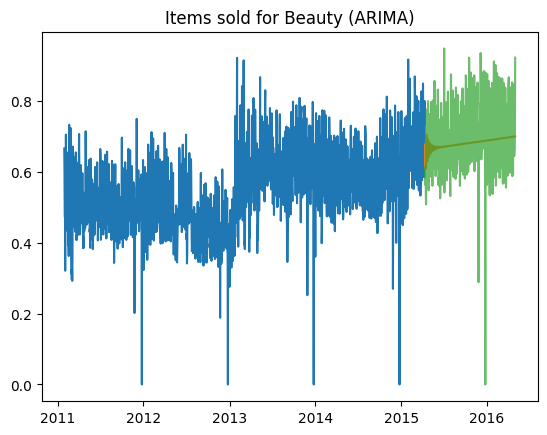

In [32]:
# Plot the points and the forecasts
plt.plot(train)
plt.plot(preds)
plt.plot(test, alpha = 0.7)
plt.title("Items sold for Beauty (ARIMA)")

Text(0.5, 1.0, 'Items sold for Beauty (SARIMA)')

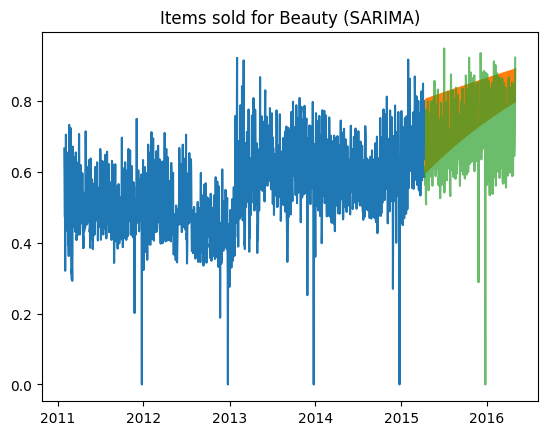

In [33]:
# Plot the points and the forecasts
plt.plot(train)
plt.plot(preds_seasonal)
plt.plot(test, alpha = 0.7)
plt.title("Items sold for Beauty (SARIMA)")

Text(0.5, 1.0, 'Forecasts (ARIMA) and predictions (testing on 20% of training data)')

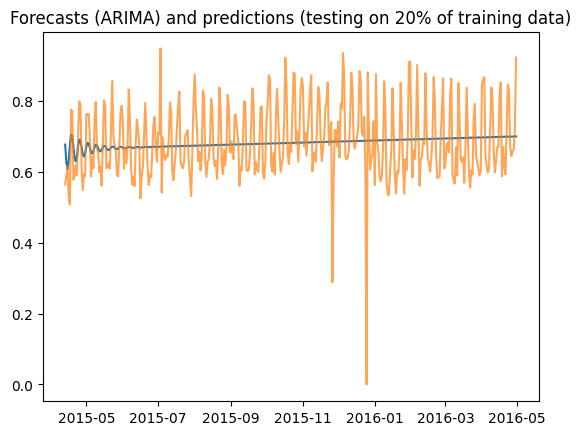

In [34]:
plt.plot(preds)
plt.plot(test, alpha = 0.7)
plt.title("Forecasts (ARIMA) and predictions (testing on 20% of training data)")

Text(0.5, 1.0, 'Forecasts (SARIMA) and preditions (testing on 20% of training data)')

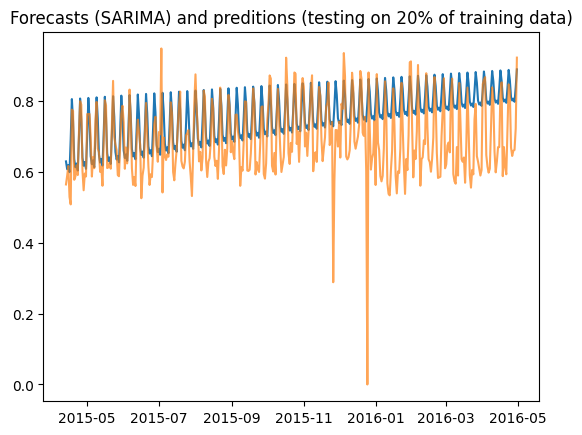

In [35]:
plt.plot(preds_seasonal)
plt.plot(test, alpha = 0.7)
plt.title("Forecasts (SARIMA) and preditions (testing on 20% of training data)")

#### 4.5.2. <a id='toc4_5_2_'></a>[Fitting Auto SARIMA Models for Each Product Category](#toc0_)
We then generated predictions for each product category for the next 21 days according to the submission format. Since there were only three models for each category, to populate the submission csv, we assumed that all items in each category sold the same number.

Notably, fitting AUTO ARIMA on each product category yielded the same paramters for the model.

We got a Kaggle score of 3.89, which was quite bad in comparison to ML and naive models.

In [36]:
# Fit a seasonal auto_arima model (m = 7, weekly seasonality)
modl_seasonal_beauty = auto_arima(s_beauty, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=10, max_q=10, max_P=10, max_Q=10, max_d = 10, max_D=10, m = 7, 
                     seasonal=True, stepwise=False, random = True, n_jobs = -1, 
                     random_state = 0, suppress_warnings=True,
                     error_action='ignore', trace = True)

pred_beauty = modl_seasonal_beauty.predict(21).apply(np.ceil)


Best model:  ARIMA(0,1,3)(1,0,1)[7] intercept
Total fit time: 10.383 seconds


In [37]:
# Fit a seasonal auto_arima model (m = 7, weekly seasonality)
modl_seasonal_food = auto_arima(s_food, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=10, max_q=10, max_P=10, max_Q=10, max_d = 10, max_D=10, m = 7, 
                     seasonal=True, stepwise=False, random = True, n_jobs = -1, 
                     random_state = 0, suppress_warnings=True,
                     error_action='ignore', trace = True)

pred_food = modl_seasonal_food.predict(21).apply(np.ceil)


Best model:  ARIMA(0,1,3)(1,0,1)[7] intercept
Total fit time: 12.977 seconds


In [38]:
# Fit a seasonal auto_arima model (m = 7, weekly seasonality)
modl_seasonal_cleaning = auto_arima(s_cleaning, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=10, max_q=10, max_P=10, max_Q=10, max_d = 10, max_D=10, m = 7, 
                     seasonal=True, stepwise=False, random = True, n_jobs = -1, 
                     random_state = 0, suppress_warnings=True,
                     error_action='ignore', trace = True)

pred_cleaning = modl_seasonal_cleaning.predict(21).apply(np.ceil)


Best model:  ARIMA(0,1,3)(1,0,1)[7] intercept
Total fit time: 9.751 seconds


In [39]:
df_sample_sub = pd.read_csv(SAMPLE_CSV_PATH)

# Assign predictions to 
df_sample_sub.iloc[beauty_idx, 1:] = pred_beauty.values
df_sample_sub.iloc[cleaning_idx, 1:] = pred_cleaning.values
df_sample_sub.iloc[food_idx, 1:] = pred_food.values

# Export
# df_sample_sub.to_csv(EXPORT_PATH+"/submission_2.csv", header=True, index=False)

### 4.6. <a id='toc4_6_'></a>[Conclusion and Future Work](#toc0_)

While the visualised forecasts seemed good, the Kaggle RMSE was quite poor with both ARIMA and SARIMA. Though SARIMA semmed to better capture the variance of the data, it still paled in comparison to naive methods and ML predictions. Most likely because we trained ARIMA and SARIMA on only the mean of items sold for each day, whereas the other 2 types of models were able to be trained on all the items of varying time periods. So while SARIMA seems to have good potential in capturing trends, it was limited by the training data.

Further, we suggest using AUTO SARIMA in future work as seen through the more negative AIC overall. While the ACF / PACF plots gives a good indication of seasonality, perhaps the p,d,q and P,D,Q parameters are hard to detect because there are underlying seasonalities beyond just the first 7 days.

Future work:
- According to the visualised forecasts on the test set and also the RMSE, it seems that just predicting on the average of items sold (and aggregated by product category) was quite successful. However, the Kaggle RMSE was quite poor. Perhaps the mean of the items sold of each day was a poor proxy of actual items sold. Hence, further work could be done to train models on smaller subsets of the data such as store (because there are 10 stores), or incorporating hierarchical forecasting to train models at different levels and then still be able to retain some of the information from these levels instead of losing all the details by taking the mean of all items to forecast.

- Keeping in mind that the visualised forecasts were predicting for 21 days and testing on the first 21 days of the next 20% of the train / test split. While the visualisations showed that the predictions closely followed the trend of the actual data, we are not sure whether the model actually captured more global trends. Hence, it could be worth considering other length of forecasts (such as > 21 days), to assess performance of the model.

- It is worth to try other combinations of AR and MA, including the seasonal order component, because the final models we used for submission on Kaggle were using a random grid search, so the globally optimal parameters might not be what was returned.

## 5. <a id='toc5_'></a>[Machine Learning Modelling](#toc0_)

### 5.1. <a id='toc5_1_'></a>[Data Structuring for Machine Learning (ML)](#toc0_) 

#### NOTE: 
Don't need to run this section because it produces the csv that is already included in (```"\datasets\long_train_6_mths_with_lags.csv"```) file for ML modelling in section 6. Code is placed here for transparency to show the feature engineering process.

This part produces the .csv that is later used in Section 5.2, merged from the four datasets.

Steps:
1. Merge Sales and Prices and Calendar Data
2. Create long form dataframe (each row has units sold for per item per day)
3. Creating lags of units sold (7, 14, 21) as features, and time based categorical features (i.e. week of month, day of year etc.)

#### 5.1.1. <a id='toc5_1_1_'></a>[Merge Sales and Prices and Calendar Data](#toc0_)

In [40]:
# Read datasets
df_cal = pd.read_csv(CAL_CSV_PATH)
df_prices = pd.read_csv(PRICES_CSV_PATH)
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_sub = pd.read_csv(SAMPLE_CSV_PATH)

In the interests of computational efficiency, we take the last date of train data till 6 months before that date. So we train on 6 months of training data to forecast for the next 21 days.

In [41]:
# NOTE: Change subset_start_date to change size of train dataset
subset_start_date = "2015-10-30"
df_cal_subset = df_cal.set_index("date")
subset_end_date = df_cal.loc[df_cal["d"] == df_sub.columns[-1]]["date"].iloc[0]

df_cal_subset = df_cal_subset.loc[subset_start_date:subset_end_date]
df_cal_subset = df_cal_subset.reset_index()
df_cal_subset.head()

date  wm_yr_wk   weekday  wday  month  year       d
0  2015-10-30     11539    Friday     7     10  2015  d_1736
1  2015-10-31     11540  Saturday     1     10  2015  d_1737
2  2015-11-01     11540    Sunday     2     11  2015  d_1738
3  2015-11-02     11540    Monday     3     11  2015  d_1739
4  2015-11-03     11540   Tuesday     4     11  2015  d_1740

Not all items have prices in the df_price dataset (as seen from the differing lengths when subsetting df_price by different weeks)

Which introduces NAs in the merged dataset later on for random items on random days. So we can drop these rows with NAs later on.

In [57]:
print(df_prices.loc[df_prices["wm_yr_wk"] == 11547].shape)
print(df_prices.loc[df_prices["wm_yr_wk"] == 11617].shape)

(30466, 4)
(30490, 4)


In [42]:
# Merge prices to subset
df_prices_cal = df_cal_subset.merge(df_prices, on = "wm_yr_wk", how = "left")
df_prices_cal["id"] = df_prices_cal["item_id"].add("_").add(df_prices_cal["store_id"])
df_prices_cal = df_prices_cal.drop(['store_id'], axis=1)

In [43]:
# Return day_ids and dates for the subset
d_to_date_dict_no_forecast = dict(zip(list(df_cal_subset.index[:-21]), list(df_cal_subset["d"][:-21])))
d_to_date_dict = dict(zip(list(df_cal_subset.index), list(df_cal_subset["d"])))

# Create dict to rename columns for submission
sub_dates = pd.date_range(start = "2016-05-01", end = "2016-05-21")
d_to_date = dict(zip(list(df_sub.columns[1:]), list(sub_dates)))
date_to_d = dict(zip(list(sub_dates), list(df_sub.columns[1:])))

#### 5.1.2. <a id='toc5_1_2_'></a>[Create Long Form Dataframe](#toc0_)

In [44]:
# Subset the relevant dates from train.csv
df_train_subset = df_train[list(df_train.columns[:6]) + list(d_to_date_dict_no_forecast.values())]
df_long_train = df_train_subset.melt(id_vars = list(df_train_subset.columns[:6]), value_vars=list(df_train_subset.columns[6:]), var_name = "d", value_name="units_sold")
df_long_train.head()

id       item_id subcat_id category_id store_id region_id  \
0  Beauty_1_001_East_1  Beauty_1_001  Beauty_1      Beauty   East_1      East   
1  Beauty_1_002_East_1  Beauty_1_002  Beauty_1      Beauty   East_1      East   
2  Beauty_1_003_East_1  Beauty_1_003  Beauty_1      Beauty   East_1      East   
3  Beauty_1_004_East_1  Beauty_1_004  Beauty_1      Beauty   East_1      East   
4  Beauty_1_005_East_1  Beauty_1_005  Beauty_1      Beauty   East_1      East   

        d  units_sold  
0  d_1736           2  
1  d_1736           1  
2  d_1736           0  
3  d_1736           0  
4  d_1736           1

In [61]:
# Melt submission dataframe to same format as train
df_sub[["item_id", "category_id", "store_id", "region_id"]] = df_train[["item_id", "category_id", "store_id", "region_id"]]
df_temp = df_sub["item_id"].str.split("_", n = 2, expand = True).iloc[:, :2]
df_sub["subcat_id"] = df_temp[0].str.cat(df_temp[1], sep = "_")
df_sub.head()

id  d_1920  d_1921  d_1922  d_1923  d_1924  d_1925   
0  Beauty_1_001_East_1       1       1       1       1       1       1  \
1  Beauty_1_002_East_1       1       1       1       1       1       1   
2  Beauty_1_003_East_1       1       1       1       1       1       1   
3  Beauty_1_004_East_1       1       1       1       1       1       1   
4  Beauty_1_005_East_1       1       1       1       1       1       1   

   d_1926  d_1927  d_1928  ...  d_1936  d_1937  d_1938  d_1939  d_1940   
0       1       1       1  ...       1       1       1       1       1  \
1       1       1       1  ...       1       1       1       1       1   
2       1       1       1  ...       1       1       1       1       1   
3       1       1       1  ...       1       1       1       1       1   
4       1       1       1  ...       1       1       1       1       1   

        item_id  category_id  store_id  region_id  subcat_id  
0  Beauty_1_001       Beauty    East_1       East   Beauty_1  
1  Beauty_1_002       Beauty    East_1       East   Beauty_1  
2  Beauty_1_003       Beauty    East_1       East   Beauty_1  
3  Beauty_1_004       Beauty    East_1       East   Beauty_1  
4  Beauty_1_005       Beauty    East_1       East   Beauty_1  

[5 rows x 27 columns]

In [62]:
df_sub = df_sub.melt(id_vars = ["id", "item_id", "category_id", "store_id", "region_id", "subcat_id"], value_vars = list(df_sub.columns[1:-5]), var_name = "d", value_name = "units_sold")
df_sub.head()

id       item_id category_id store_id region_id subcat_id   
0  Beauty_1_001_East_1  Beauty_1_001      Beauty   East_1      East  Beauty_1  \
1  Beauty_1_002_East_1  Beauty_1_002      Beauty   East_1      East  Beauty_1   
2  Beauty_1_003_East_1  Beauty_1_003      Beauty   East_1      East  Beauty_1   
3  Beauty_1_004_East_1  Beauty_1_004      Beauty   East_1      East  Beauty_1   
4  Beauty_1_005_East_1  Beauty_1_005      Beauty   East_1      East  Beauty_1   

        d  units_sold  
0  d_1920           1  
1  d_1920           1  
2  d_1920           1  
3  d_1920           1  
4  d_1920           1

In [64]:
# Concat df_sub to bottom of df_long_train
df_long_train = pd.concat([df_long_train, df_sub], axis = 0)

In [67]:
print(df_long_train.dtypes)
df_long_train["id"] = df_long_train["id"].astype("string")
df_long_train["category_id"] = df_long_train["category_id"].astype("string")
df_long_train["item_id"] = df_long_train["item_id"].astype("string")
df_long_train["subcat_id"] = df_long_train["subcat_id"].astype("string")
df_long_train["store_id"] = df_long_train["store_id"].astype("string")
df_long_train["region_id"] = df_long_train["region_id"].astype("string")
df_long_train["d"] = df_long_train["d"].astype("string")

id             object
item_id        object
subcat_id      object
category_id    object
store_id       object
region_id      object
d              object
units_sold      int64
dtype: object


In [68]:
print(df_prices_cal.dtypes)
df_prices_cal["weekday"] = df_prices_cal["weekday"].astype("string")
df_prices_cal["d"] = df_prices_cal["d"].astype("string")
df_prices_cal["id"] = df_prices_cal["id"].astype("string")
df_prices_cal["item_id"] = df_prices_cal["item_id"].astype("string")
df_prices_cal["date"] = pd.to_datetime(df_prices_cal["date"])

date           object
wm_yr_wk        int64
weekday        object
wday            int64
month           int64
year            int64
d              object
item_id        object
sell_price    float64
id             object
dtype: object


In [69]:
# Merge training data with calendar and price data
df_long_train = df_long_train.merge(df_prices_cal, on = ['d', 'id'], how = 'left')
df_long_train.head()

id     item_id_x subcat_id category_id store_id region_id   
0  Beauty_1_001_East_1  Beauty_1_001  Beauty_1      Beauty   East_1      East  \
1  Beauty_1_002_East_1  Beauty_1_002  Beauty_1      Beauty   East_1      East   
2  Beauty_1_003_East_1  Beauty_1_003  Beauty_1      Beauty   East_1      East   
3  Beauty_1_004_East_1  Beauty_1_004  Beauty_1      Beauty   East_1      East   
4  Beauty_1_005_East_1  Beauty_1_005  Beauty_1      Beauty   East_1      East   

        d  units_sold       date  wm_yr_wk weekday  wday  month    year   
0  d_1736           2 2015-10-30   11539.0  Friday   7.0   10.0  2015.0  \
1  d_1736           1 2015-10-30   11539.0  Friday   7.0   10.0  2015.0   
2  d_1736           0 2015-10-30   11539.0  Friday   7.0   10.0  2015.0   
3  d_1736           0 2015-10-30   11539.0  Friday   7.0   10.0  2015.0   
4  d_1736           1 2015-10-30   11539.0  Friday   7.0   10.0  2015.0   

      item_id_y  sell_price  
0  Beauty_1_001        8.26  
1  Beauty_1_002        3.97  
2  Beauty_1_003        2.97  
3  Beauty_1_004        4.64  
4  Beauty_1_005        2.88

In [70]:
# Remove extra id cols
df_long_train["item_id"] = df_long_train["item_id_x"]
df_long_train = df_long_train.drop(["item_id_x", "item_id_y"], axis = 1)

#### 5.1.3. <a id='toc5_1_3_'></a>[Creating Lags for 7, 14 and 21 and Other Time-based Features](#toc0_)


We created lags in multiples of 7 because of the weekly seasonality we observed in the EDA. So the units sold one week (and more) ago could be good predictors for the current week.

In [74]:
# Take dates from selected start date up till the end of the train dataset
mask = (df_cal['date'] >= subset_start_date) & (df_cal['date'] <= "2016-04-30")
train_subset_d = df_cal.loc[mask]["d"]

# Append sub df to train to capture the shift
df_sub = pd.read_csv("../datasets/sample_submission.csv")
df_lags = df_train.loc[:, ["id"] + list(train_subset_d)]
df_lags[list(df_sub.columns[1:])] = df_sub.iloc[:, 1:]

# Set forecast portion to 0
df_lags[list(df_sub.columns[1:])] = 0

In [75]:
df_train_l21 = df_lags.iloc[:, 1:].shift(21, axis = 1)
df_train_l21["id"] = df_lags["id"]

df_train_l21.head()

d_1736  d_1737  d_1738  d_1739  d_1740  d_1741  d_1742  d_1743  d_1744   
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  \
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   d_1745  ...  d_1932  d_1933  d_1934  d_1935  d_1936  d_1937  d_1938   
0     NaN  ...       0       1       1       0       0       0       2  \
1     NaN  ...       0       0       0       0       1       0       0   
2     NaN  ...       1       1       1       0       0       1       1   
3     NaN  ...       3       7       2       0       0       1       2   
4     NaN  ...       2       2       4       1       0       2       3   

   d_1939  d_1940                   id  
0       0       3  Beauty_1_001_East_1  
1       0       0  Beauty_1_002_East_1  
2       0       2  Beauty_1_003_East_1  
3       4       1  Beauty_1_004_East_1  
4       1       0  Beauty_1_005_East_1  

[5 rows x 206 columns]

In [76]:
# Check if the last day of train data has been pushed back by 21 days
assert(df_lags["d_1919"].equals(df_train_l21["d_1940"]))

In [77]:
# Do for lag 7 and 14
df_train_l7 = df_lags.iloc[:, 1:].shift(7, axis = 1)
df_train_l7["id"] = df_lags["id"]

df_train_l14 = df_lags.iloc[:, 1:].shift(14, axis = 1)
df_train_l14["id"] = df_lags["id"]

# Pivot all to match the long form train df
df_train_l7 = df_train_l7.melt(id_vars = "id", value_vars = list(df_train_l7.columns[:-1]), var_name = "d", value_name = "units_sold_l7")
df_train_l14 = df_train_l14.melt(id_vars = "id", value_vars = list(df_train_l14.columns[:-1]), var_name = "d", value_name = "units_sold_l14")
df_train_l21 = df_train_l21.melt(id_vars = "id", value_vars = list(df_train_l21.columns[:-1]), var_name = "d", value_name = "units_sold_l21")

# Fill NA as 0 (NOTE: Is this a good way to deal with the NA?)
df_train_l7["units_sold_l7"] = df_train_l7["units_sold_l7"].fillna(0)
df_train_l14["units_sold_l14"] = df_train_l14["units_sold_l14"].fillna(0)
df_train_l21["units_sold_l21"] = df_train_l21["units_sold_l21"].fillna(0)

df_train_l7["units_sold_l7"] = df_train_l7["units_sold_l7"].astype(int)
df_train_l14["units_sold_l14"] = df_train_l14["units_sold_l14"].astype(int)
df_train_l21["units_sold_l21"] = df_train_l21["units_sold_l21"].astype(int)

In [78]:
# Check that there are exact amount of entries, so there will be no NAs
assert(df_train_l7.shape[0] == df_long_train.shape[0])
assert(df_train_l14.shape[0] == df_long_train.shape[0])
assert(df_train_l21.shape[0] == df_long_train.shape[0])

##### 5.1.3.1. <a id='toc5_1_3_1_'></a>[Merge Lags into long train df](#toc0_)

As the order of the items were retained throughout the merging, we can just append the new lags as new columns in the long train dataset. If not, merging by ID takes very long. 

In [79]:
df_long_train["units_sold_l7"] = df_train_l7["units_sold_l7"]
df_long_train["units_sold_l14"] = df_train_l14["units_sold_l14"]
df_long_train["units_sold_l21"] = df_train_l21["units_sold_l21"]

df_long_train.head()

id subcat_id category_id store_id region_id       d   
0  Beauty_1_001_East_1  Beauty_1      Beauty   East_1      East  d_1736  \
1  Beauty_1_002_East_1  Beauty_1      Beauty   East_1      East  d_1736   
2  Beauty_1_003_East_1  Beauty_1      Beauty   East_1      East  d_1736   
3  Beauty_1_004_East_1  Beauty_1      Beauty   East_1      East  d_1736   
4  Beauty_1_005_East_1  Beauty_1      Beauty   East_1      East  d_1736   

   units_sold       date  wm_yr_wk weekday  wday  month    year  sell_price   
0           2 2015-10-30   11539.0  Friday   7.0   10.0  2015.0        8.26  \
1           1 2015-10-30   11539.0  Friday   7.0   10.0  2015.0        3.97   
2           0 2015-10-30   11539.0  Friday   7.0   10.0  2015.0        2.97   
3           0 2015-10-30   11539.0  Friday   7.0   10.0  2015.0        4.64   
4           1 2015-10-30   11539.0  Friday   7.0   10.0  2015.0        2.88   

        item_id  units_sold_l7  units_sold_l14  units_sold_l21  
0  Beauty_1_001              0               0               0  
1  Beauty_1_002              0               0               0  
2  Beauty_1_003              0               0               0  
3  Beauty_1_004              0               0               0  
4  Beauty_1_005              0               0               0

##### 5.1.3.2. <a id='toc5_1_3_2_'></a>[Create Time-based Features](#toc0_)
I.e. day_of_year is between 1 and 365, week_of_month is between 1 and 4.
These variables are categorical variables, because even though they are integers, the relationship between week 1 and 2 is not the same as between the integers 1 and 2 only.

Creating these features would help to capture time based correlations and seasonalities between the dates and the items sold. For example, if there is a peak of units sold every 7th day of the week, that correlation would be captured by creating these time based features.

In [80]:
df_long_train["date"] = pd.to_datetime(df_long_train["date"])
df_long_train['day_of_month'] = df_long_train['date'].dt.day
df_long_train['day_of_year'] = df_long_train['date'].dt.dayofyear
df_long_train['week_of_month'] = (df_long_train['date'].dt.day - 1) // 7 + 1
df_long_train['week_of_year'] = df_long_train['date'].dt.strftime('%U')

In [81]:
# Clean data before exporting to csv
df_long_train = df_long_train.set_index("date")

Uncomment this to export to csv (takes about 2.5 mins to export):

In [83]:
 # df_long_train.to_csv("../datasets/long_train_6_mths_with_lags.csv")

### 5.2. <a id='toc5_2_'></a>[Machine Learning Modelling Using Light Gradient Boosting Machine (LGBM)](#toc0_)

Not the best model score on Kaggle (2.39, better than SARIMA, worse than naive methods). Did not come in top 5 models overall. Would require more time for feature engineering and other ways to cope with the size of the dataset (here we limited it to the last 6 months of the train.csv)

**NOTE 1**: Due to the .csv file size (850mb for 6 months training data), the required .csv for this part is located in (```\datasets\long_train_6_mths_with_lags.csv```).

**NOTE 2**: Depending on size of your RAM, you could run into memory issues when training the LGBM model. If so, suggest that you restart the kernel and run the code from this section onwards so that only the necessary objects are loaded into memory.

#### 5.2.1. <a id='toc5_2_1_'></a>[Data Cleaning](#toc0_)

In [45]:
# Read dataset created from Section 5.1.
df_sub = pd.read_csv("../datasets/sample_submission.csv")
df_long_train = pd.read_csv("../datasets/long_train_6_mths_with_lags.csv")
df_long_train.head()

date                   id subcat_id category_id store_id region_id  \
0  2015-10-30  Beauty_1_001_East_1  Beauty_1      Beauty   East_1      East   
1  2015-10-30  Beauty_1_002_East_1  Beauty_1      Beauty   East_1      East   
2  2015-10-30  Beauty_1_003_East_1  Beauty_1      Beauty   East_1      East   
3  2015-10-30  Beauty_1_004_East_1  Beauty_1      Beauty   East_1      East   
4  2015-10-30  Beauty_1_005_East_1  Beauty_1      Beauty   East_1      East   

        d  units_sold  wm_yr_wk weekday  ...    year  sell_price  \
0  d_1736           2   11539.0  Friday  ...  2015.0        8.26   
1  d_1736           1   11539.0  Friday  ...  2015.0        3.97   
2  d_1736           0   11539.0  Friday  ...  2015.0        2.97   
3  d_1736           0   11539.0  Friday  ...  2015.0        4.64   
4  d_1736           1   11539.0  Friday  ...  2015.0        2.88   

        item_id  units_sold_l7 units_sold_l14  units_sold_l21  day_of_month  \
0  Beauty_1_001              0              0               0          30.0   
1  Beauty_1_002              0              0               0          30.0   
2  Beauty_1_003              0              0               0          30.0   
3  Beauty_1_004              0              0               0          30.0   
4  Beauty_1_005              0              0               0          30.0   

   day_of_year  week_of_month  week_of_year  
0        303.0            5.0          43.0  
1        303.0            5.0          43.0  
2        303.0            5.0          43.0  
3        303.0            5.0          43.0  
4        303.0            5.0          43.0  

[5 rows x 22 columns]

Ensure that dtypes are consistent before training model:

In [85]:
print(df_long_train.dtypes)

date               object
id                 object
subcat_id          object
category_id        object
store_id           object
region_id          object
d                  object
units_sold          int64
wm_yr_wk          float64
weekday            object
wday              float64
month             float64
year              float64
sell_price        float64
item_id            object
units_sold_l7       int64
units_sold_l14      int64
units_sold_l21      int64
day_of_month      float64
day_of_year       float64
week_of_month     float64
week_of_year      float64
dtype: object


In [86]:
# Assigning correct category types
df_long_train["date"] = pd.to_datetime(df_long_train["date"])
categorical_features = ["category_id", "store_id", "region_id", "weekday", "wday", "month", "year", "day_of_month", "day_of_year", "week_of_month", "week_of_year"]
string_features = ["id", "subcat_id", "d", "item_id"]

for f in categorical_features :
    df_long_train[f] = df_long_train[f].astype("category")

for f in string_features :
    df_long_train[f] = df_long_train[f].astype("string")

In [87]:
# Sort dataframe by date, retain original index so items are in order
df_long_train = df_long_train.rename_axis("idx")
df_long_train = df_long_train.sort_values(by = ["idx", "date"])
df_long_train["idx"] = df_long_train.index
df_long_train = df_long_train.set_index("date")
df_long_train.head()

id subcat_id category_id store_id region_id   
date                                                                       
2015-10-30  Beauty_1_001_East_1  Beauty_1      Beauty   East_1      East  \
2015-10-30  Beauty_1_002_East_1  Beauty_1      Beauty   East_1      East   
2015-10-30  Beauty_1_003_East_1  Beauty_1      Beauty   East_1      East   
2015-10-30  Beauty_1_004_East_1  Beauty_1      Beauty   East_1      East   
2015-10-30  Beauty_1_005_East_1  Beauty_1      Beauty   East_1      East   

                 d  units_sold  wm_yr_wk weekday wday  ... sell_price   
date                                                   ...              
2015-10-30  d_1736           2   11539.0  Friday  7.0  ...       8.26  \
2015-10-30  d_1736           1   11539.0  Friday  7.0  ...       3.97   
2015-10-30  d_1736           0   11539.0  Friday  7.0  ...       2.97   
2015-10-30  d_1736           0   11539.0  Friday  7.0  ...       4.64   
2015-10-30  d_1736           1   11539.0  Friday  7.0  ...       2.88   

                 item_id  units_sold_l7 units_sold_l14  units_sold_l21   
date                                                                     
2015-10-30  Beauty_1_001              0              0               0  \
2015-10-30  Beauty_1_002              0              0               0   
2015-10-30  Beauty_1_003              0              0               0   
2015-10-30  Beauty_1_004              0              0               0   
2015-10-30  Beauty_1_005              0              0               0   

            day_of_month  day_of_year week_of_month week_of_year idx  
date                                                                  
2015-10-30          30.0        303.0           5.0         43.0   0  
2015-10-30          30.0        303.0           5.0         43.0   1  
2015-10-30          30.0        303.0           5.0         43.0   2  
2015-10-30          30.0        303.0           5.0         43.0   3  
2015-10-30          30.0        303.0           5.0         43.0   4  

[5 rows x 22 columns]

#### 5.2.2. <a id='toc5_2_2_'></a>[Correlation of Price on Sales](#toc0_)

Before fitting the ML model, we investigate the correlation of prices on sales for rationalisation of including price in our model (from a statistical point of view rather than a theory-based one).

In [88]:
corr = df_long_train[['sell_price', 'units_sold']].corr()
print('Correlation between sales and price:', corr.iloc[0,1])

Correlation between sales and price: -0.1312463936768341


There is a slight negative correlation between units sold and price, which is not surprising, given the basic concept that people buy less items if the price is higher.
However, -0.13 is a small negative correlation only, so we cannot conclude that there is a strong negative correlation. This is also seen in the scatter plot below with no strong linear correlation between the features.

Another explanation for this slight negative correlation could also be that the cheaper products tend to be the more essential goods (like food), which people would buy even if prices were high. So the demand of the products is not necessarily based on price alone.

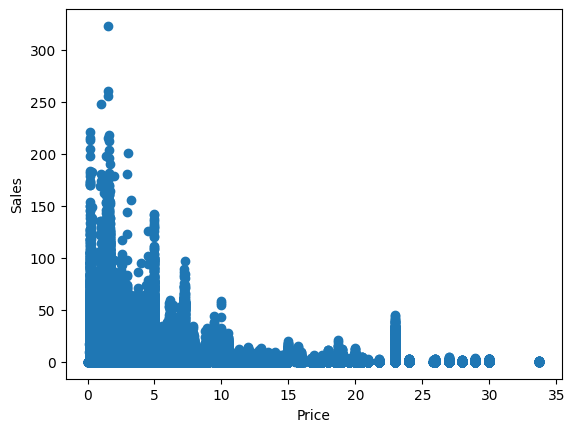

In [89]:
plt.scatter(df_long_train['sell_price'], df_long_train['units_sold'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

#### 5.2.3. <a id='toc5_2_3_'></a>[Fitting the LGBM Model](#toc0_)

We fit this model using all possible features, including price and lags.

First, we do a 80/20 test split and look at the rmse on 20% of the test data. Then use the entire train dataset to predict for the subsequent 21 days. 

**NOTE**: The trained parameters for the model is located in **\submissions\ml_best_models_params\lgb_model_fc.txt**, so you can load the model from the file instead of running the code below.

In [90]:
# Create test split
end_train_date = "2016-04-30"
lagged_features = ["units_sold_l7", "units_sold_l14", "units_sold_l21"]

# Select training set until before forecast date 
X_subset = df_long_train.loc[:end_train_date][["category_id", "store_id", "region_id", "wday", "month", "year", "day_of_month", "day_of_year", "week_of_month", "week_of_year", "sell_price"] + lagged_features].dropna()

X_subset = pd.get_dummies(X_subset)
y = df_long_train.loc[:end_train_date]['units_sold'].dropna().values

In [91]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size = 0.2)

# LGBM dataset
train_data_80 = lgb.Dataset(X_train, label = y_train, free_raw_data = True)
params = {'objective': 'regression', 'metric': 'rmse'}

In [21]:
# Fit LGBM
lgb_model_80 = lgb.train(params, train_data_80)

# Test
pred = lgb_model_80.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 4486365, number of used features: 206
[LightGBM] [Info] Start training from score 1.282746


In [17]:
# Print RMSE
print(np.sqrt(mean_squared_error(y_test, pred.round().astype(int))))

2.3016646005403154


#### 5.2.4. <a id='toc5_2_4_'></a>[Forecast for the Next 21 Days, Using the Entire `train` dataset](#toc0_)

**This model is our best one using ML by Kaggle score, obtaining a score of 2.39.**

*NOTE: Ran into memory error when training for 1 year of training data, the error was that it required 35.2 Gb of space. So we stick to 6 months training data.*

In [7]:
fc_days_dr = pd.date_range(start = "2016-05-01", end = "2016-05-21")
fc_days_idx = df_long_train.loc[fc_days_dr]["idx"]

train_data = lgb.Dataset(X_subset, label = y, free_raw_data = True)
params = {'objective': 'regression', 'metric': 'rmse'}
lgb_model = lgb.train(params, train_data)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.311347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 5607957, number of used features: 284
[LightGBM] [Info] Start training from score 1.303665


In [9]:
# Predict using the features already created from the last 21 days of the df
x_fc_subset = X_subset.iloc[-len(fc_days_idx):, :]
fc = lgb_model.predict(x_fc_subset).round().astype(int)

In [10]:
df_preds = pd.DataFrame(
    {"date" : df_long_train.index[fc_days_idx],
     "y" : fc,
     "id" : df_long_train.loc[fc_days_dr]["id"]}
)

df_preds = df_preds.reset_index(drop = True)

fc_dr = pd.date_range(start = "2016-05-01", periods = 21)
date_to_d_dict_fc = dict(zip(list(fc_dr), list(df_sub.columns[1:])))

df_preds = df_preds.pivot(index = "id", columns = "date", values = "y").reset_index().rename(date_to_d_dict_fc, axis = 1)
df_preds.head()

date  y                   id
0 2016-05-01  1  Beauty_1_001_East_1
1 2016-05-01  0  Beauty_1_002_East_1
2 2016-05-01  0  Beauty_1_003_East_1
3 2016-05-01  2  Beauty_1_004_East_1
4 2016-05-01  2  Beauty_1_005_East_1

In [28]:
# df_preds.to_csv("../submissions/ml_preds/6_mths_train_with_lags.csv", index = False)

In [14]:
# Export model used for forecast
# lgb_model.save_model("../submissions/ml_best_models_params/lgb_model_fc.txt", num_iteration=lgb_model.best_iteration)

#### 5.2.5. <a id='toc5_2_5_'></a>[Looking at the Best Features for the Model](#toc0_)

The lagged features performed the best, starting from lag 7, 14 and 21. The importance of the features is confirmed by the seasonality of a week as mentioned in the EDA. So the day one week ago would be the best indicator of how many items would be sold for the same day in the upcoming week. Previous weeks gets less important for forecasting.

Also, though there was not a strong correlation with price, price was the second most important feature, suggesting that there is some relation to demand and supply.

There seems like product category (food and beauty) were also relatively strong predictors. Maybe these product categories have distinct trends compared to cleaning.

The east region (along with a few other stores in the east) also seemed to be relatively important.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

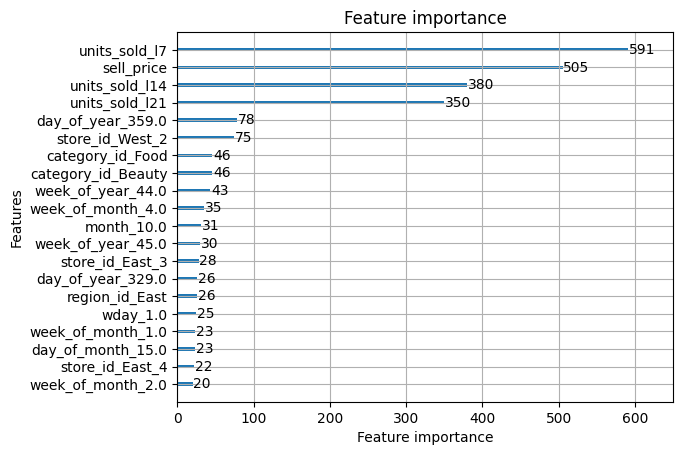

In [13]:
lgb.plot_importance(lgb_model, max_num_features=20)

#### 5.2.6. <a id='toc5_2_6_'></a>[Evaluation of ML Model](#toc0_)
Overall, model did provide decent performance (better than ARIMA), but not as good as naive methods. Perhaps because we were limited by the feature engineering that only used lags by items sold. Also the preparation of data was time intensive (took about 2 afternoons to prepare), and we ran into frequent memory issues. While there is untapped potential for the ML method, naive methods are still the most time and computationally effective methods of forecasting for this dataset (and it can be run on all items for all days, instead of ML which could be run only on the last 6 months of train data). 

#### 5.2.7. <a id='toc5_2_7_'></a>[Future Work](#toc0_)
- Creating more lag features, such as price lags (but we have to first check if there is seasonality for price). If there is seasonality for price, perhaps there could be for other features as well.
- Doing more EDA on the predicted dataset from LGBM, and visualising the subtrees of the model. This could give us more information as to the features that could be more correlated with 
- Conduct hyperparameter tuning for lgbm, and trying xgboost. 
- We could also try other more creative ways of choosing the train data (other than the last 6 months prior to forecast, as what we have done here). Maybe we could have 10 different models by each store, and then use them to build some ensemble model to predict each item.

## 6. Top models comparison, and future work
In order of Kaggle score, and including predictions in .csv under ```/submissions``` folder:
- Window Average (window = 21) (2.27) (```wa_21.csv```)
- Window Average (window = 28) (2.28) (```wa_28.csv```)
- Window Average (Window = 14) (2.29) (```wa_14.csv```)
- Holt Winters (season = 7) (2.29) (```holt_winters.csv```)
- Window Average (window = 12) (2.30) (```wa_12.csv```)
- LGBM training on 6 months data, with price, 7, 14 and 21 units sold lags as features (2.39) (```6_mths_train_with_lags.csv```)
- SARIMA models (~ 3.8 - 3.9) (.csv not included, RMSE too high)

Clearly the naive models performed the best relatively. Perhaps this is because we were able to train it on all of the data points, and that the time series is correlative enough with its recent lags due to the seasonality that the variance between the current t and its lags are not that great, so relying on past data points is a good baseline model.

However, LGBM with some basic feature engineering + 6 months training data already had a decent score of 2.39. Perhaps because we were limited to 6 months training data we were not able to capture the year on year increase in units sold. Hence future work would include more granular feature engineering (perhaps including price lags). Clustering and hierarchical methods could also be used so that the models can still capture the daily changes, and retain the details of the yearly changes as well.

SARIMA did the poorest, but it could be due to the fact we only trained using the average units sold and assumed all 30K items sold the same amount, which most likely loses alot of detail in the training data. Hence, more creative data selection by clustering could also be used for SARIMA in the future.

## 7. <a id='toc6_'></a>[Conclusion and Future direction](#toc0_)

As seen from the notebook, the best performing models are the simplest ones, which has several implications for the client, FairStorage. It is important to first state that the output of the Window Average Model was a somewhat surprising forecast of a constant predicted number of items sold every day over the next twenty days, for each unique item in each unique store. This was surprising as we had assumed that other more complex models which might take into account the seasonality of the data (whereby items display a strong seven day trend with 1.5x more items sold in total on the weekends) would perform better, just by virtue of this alone.

In terms of functioning as a forecast, stocking according to this method means that the Stores can either maintain sufficient stocks as predicted, or adjust their pricing strategies according to the forecasted demand to drive orders toward or away accordingly, where stores have either excess or too little stocks. Rather than attempting to work with the seasonality of the store, having a constant supply may reduce the complexity of trying to handle excessive fluctuations in how much each item is used. This may also serve as buffer on slow days in case more customers come in than expected.

Further, this models' chief advantage is its Scalability and computational efficiency, which make it an ideal candidate for ColdStorage's own usage, with relatively simple lines of code being able to produce a decently performing forecast. The marginal improvements that other more complicated models may achieve (as evidenced by our competitors on the leaderboard), may not be worth the extra amount of time and coding that it might take in order to squeeze out those few improvements to the model. Further, in such a rapidly changing consumer ecosystem, overfitted models to a static time period of 5 years may be completely outdated once new products are introduced or discontinued in the last year, requiring further recalibration and remodelling. The niftiness of the WA model's advantage may therefore work to FairStorage's favour to produce a readily replicable model.

This notebook contains the summation of what we did through the weeks leading up to the submission, which, while tedious and voluminous, were ultimately somewhat disappointing in our results. As mentioned in our presentation, the group's best performing model remained that of the highly simplistic Window Average Model, and by throwing ourselves into attempting methods which were as innovative and 'catch-all-bases' aspossible, we did not manage to really tweak and refine our models well. This led to us not considering whether we could have trained models on subsets of data and then finally apply those to the last 20 days for forecasting, and instead getting stuck on trying to force one complete model onto the entirety of the data. We might have been able to get a less than complete model but one that could have been fine tuned and tweaked to give even better results. This is especially pertinent since the Window Average Model provided us with a constant prediction of each unique item's sales per day over twenty days, which is not realistic whatsoever. One might imagine that introducing a slight artificial curve to emulate the seven day seasonality might actually even improve this model's performance.

Regardless, this exercise was still a useful endeavour that taught us much about the Data Scientist's need to slow down and zoom out of the microscopic picture of working on discrete sets of models. It also gave us good insight into how a Data Science team might work together for best efficiency - the need to delegate work but regularly and efficiently come back together, utilising Github to best effect. Not all members on a team might be equally gifted in all areas of the work and hence this delegation also helps to ensure everyone is along for the ride. In all, this was a good final project!